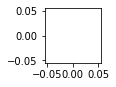

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
# force plt on windows 10
import matplotlib.pyplot as plt
plt.figure(figsize=(1,1))
plt.plot()

import sys
sys.path.append("..")

import torch
import torch.nn as nn
import numpy as np
import aggets.ds.window as window
import aggets.ds.hyper_f_load as hfl
import aggets.ds.window as window

import aggets.ds.moving as moving
import aggets.ds.aggregate3 as aggregate
import aggets.ds.hyper_f_load as hyper_f_load

## DISABLE THIS
import warnings
warnings.filterwarnings("ignore")

In [2]:
def plot(set_type, model, wg, axs, ylim=None):
    rolling = 300 if set_type == 'train' else 100
    aucs = wg.plot(model=model, model_data_fn=None, last_train=False, lr0=False, lr_t0=True,  # set_type=='train',
                   set_type=set_type, no_lr=False, model_resid=False, rolling=rolling, axs=axs,
                   plot_box_auc=False, lr_tn=10, train=0.5)

    vals = {}
    for key in aucs:
        if '=' in key:
            into = key[key.index('=') - 1:]
        else:
            into = key
        arr = vals.get(into, [])
        arr.append(np.mean(aucs[key].to_numpy()))
        vals[into] = arr
    if ylim is not None:
        plt.ylim(*ylim)
    plt.sca(axs[-1])
    plt.boxplot(list(vals.values()), showfliers=True)
    plt.xticks(range(1, len(vals.keys()) + 1), vals.keys(), rotation=90)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.ylabel('AUC')

 w 3ciej komórce notebook zawiera definicje generatorów danych

In [3]:
data = hyper_f_load.load()

# ilość punktów w oknie, próbki = proces locujący dane, ile danych losuje- > uczymy regresje i uczymy historgramy
# ile okien czasowych bedzie stanowilo nasze wejsie, bin-count=1, diskretyzacja = ile bedziemy mieli slupkow w histogramie
# 2mln pkt, to chunk size zwieszyc,

wg = aggregate.WindowGenerator(chunk_size=500, samples=5, sample_frac=0.8, 
                               input_sequence_length=10,
                               df =  data['df'], # full columns information
                               train_df = data['train'],
                               val_df = data['val'],
                               test_df = data['test'],
                               label_columns=['class'],
                               bin_count=1, discretization=20)

wg_tmp = aggregate.WindowGenerator(chunk_size=500, samples=5, sample_frac=0.8, 
                               input_sequence_length=10,
                               df =  data['df'], # full columns information
                               train_df = data['train'],
                               val_df = data['val'],
                               test_df = data['test'],
                               label_columns=['class'],
                               bin_count=1, discretization=20)

komórka 4ta inicjuje struktury danych (histogramy i regresje) dla generatora. Komórkę należy uruchomić raz i zakomentować.

In [4]:
# wg.init_structures()

komórka 5ta to zapis i odczyt zainicjowanych wcześniej struktur. Uruchamiamy raz, następnie komentujemy zapis (zostawiamy odczyt)

In [5]:
import aggets.util as util
#util.save(wg, path='window_08.bin') # chunk_size=500, samples=5, sample_frac=0.8, bin_count=1, discretization=20 (lr trains on data without bins), no normalization of aggregates, density included
wg_tmp.load_data(util.load(path='window_08.bin'))

In [6]:
wg_tmp.density = True
wg_tmp.density_encoded = True
wg_tmp.one_row_ts = True

wg_tmp.reverse_train = True
wg_tmp.shuffle_input = False
wg_tmp.shuffle_output = False
wg_tmp.double_target = False
wg_tmp.train_histograms = False

dim_p = wg_tmp.test_agges.shape[-1]
dim_d = wg_tmp.test_agges.shape[-1]
dim_lr = wg_tmp.test_lr.shape[-1]

In [9]:
print(type(wg_tmp))

<class 'aggets.ds.aggregate3.WindowGenerator'>


jak skonfigurowac siec:
ts_features = ilosc featurerow w przedziale czasowym = ilosc cech * ilosc kubelkoiw
lr_features = ile featurow w regresji + 1 

config in=10, out=5
training model lstm
epoch 0 batch 200 loss=0.0159, MTL=0.019, MVL=0.0493				
epoch 0 batch 400 loss=0.0175, MTL=0.0186, MVL=0.0493				
saving model MTL=0.018559087295833693, MVL=0.015760200311903092
*epoch 1 batch 600 loss=0.0172, MTL=0.0183, MVL=0.0158				
*epoch 1 batch 800 loss=0.0173, MTL=0.0182, MVL=0.0158				
epoch 2 batch 1000 loss=0.016, MTL=0.0175, MVL=0.0162				
epoch 2 batch 1200 loss=0.0173, MTL=0.0169, MVL=0.0162				
epoch 3 batch 1400 loss=0.0172, MTL=0.0161, MVL=0.0169				
epoch 3 batch 1600 loss=0.0169, MTL=0.0161, MVL=0.0169				
epoch 4 batch 1800 loss=0.0164, MTL=0.016, MVL=0.0161				
epoch 4 batch 2000 loss=0.0132, MTL=0.016, MVL=0.0161				


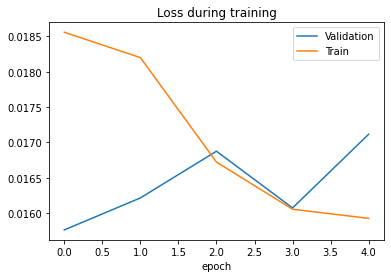

epoch 0 batch 200 loss=0.0199, MTL=0.0182, MVL=0.0158				
epoch 0 batch 400 loss=0.0195, MTL=0.0182, MVL=0.0158				
epoch 1 batch 600 loss=0.0169, MTL=0.018, MVL=0.0158				
epoch 1 batch 800 loss=0.0191, MTL=0.0182, MVL=0.0158				
epoch 2 batch 1000 loss=0.0164, MTL=0.0181, MVL=0.0158				
epoch 2 batch 1200 loss=0.0186, MTL=0.0181, MVL=0.0158				
saving model MTL=0.018081805993551196, MVL=0.015634444908651172
*epoch 3 batch 1400 loss=0.0179, MTL=0.0176, MVL=0.0156				
*epoch 3 batch 1600 loss=0.0189, MTL=0.017, MVL=0.0156				
epoch 4 batch 1800 loss=0.0158, MTL=0.0163, MVL=0.0162				
epoch 4 batch 2000 loss=0.0165, MTL=0.0161, MVL=0.0162				


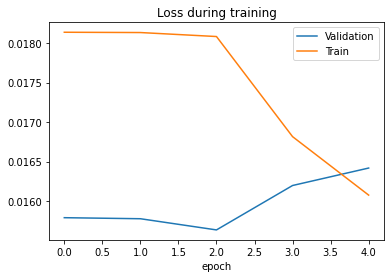

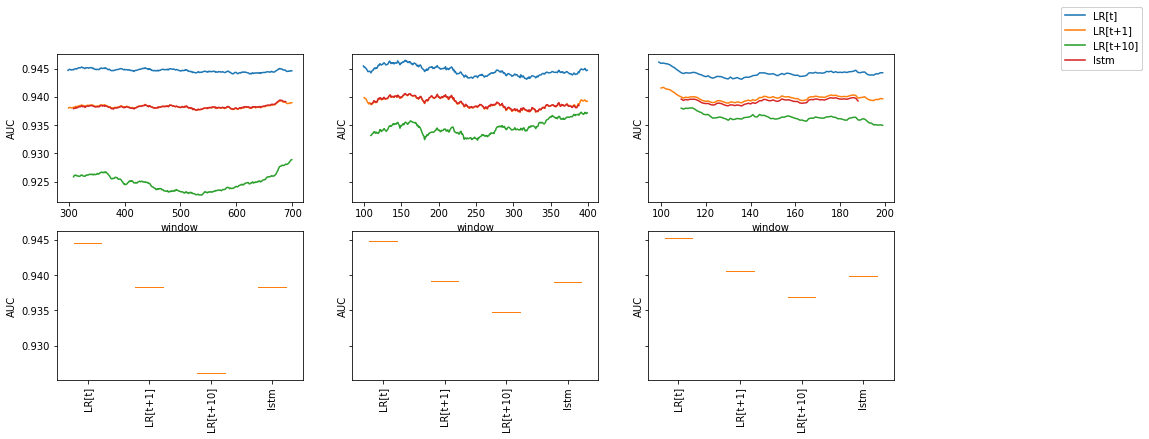

In [8]:
import aggets.model.aggregate as m_agg
import aggets.train as train

wg_tmp.input_sequence_length = 10

model = m_agg.AutoregLstmLr(dim_p + dim_d, dim_lr, num_layers=2, hidden=128,
                            output_sequence_length=5, return_deltas=False)
model.name=f'lstm'
train.train_window_models([model], wg_tmp, patience=5, validate=True, weight_decay=0, max_epochs=5,
                          lrs=[0.001, 0.0001])
model.window_config.output_sequence_length = 1
model.return_deltas = False

# przyjmuje wiecej niz jeden model
def plot_only(models, wg, ylim=None):
    _, axs = plt.subplots(ncols=3, nrows=2, sharey='row', figsize=(15,6))
    plot('train', models, wg, axs=[axs[0][0], axs[1][0]], ylim=ylim)
    plot('val',   models, wg, axs=[axs[0][1], axs[1][1]], ylim=ylim)
    plot('test',  models, wg, axs=[axs[0][2], axs[1][2]], ylim=ylim)
plot_only([model], wg_tmp)

wziac do 3 modeli i pobawic sie z parametrami, a na koncu wyplotowanie ich an jednym wykresie
model.name= parametry odwzorowane w namie

uruchamiam 1 model 5 razy, robie plot i potem kolejny

jezeli nie zmienie validate to wszystko bedzie wygladalo podobnie
patience im wiekszy tym wieksza szansa, ze uda sie poprawic, 
veight_decay, max_epchos, output_sequence_length, num_layers

problem ze zbiorem validacyjnym:


bardziej realne zadanie
- jedna część bedzie sie uczyla reg
- a druga agregatów

config in=10, out=7
training model my_model
epoch 0 batch 200 loss=0.0188, MTL=0.0203, MVL=0.0442				
epoch 0 batch 400 loss=0.0184, MTL=0.02, MVL=0.0442				
saving model MTL=0.019991880897905753, MVL=0.016148207150399684
*epoch 1 batch 600 loss=0.0185, MTL=0.0199, MVL=0.0161				
*epoch 1 batch 800 loss=0.0195, MTL=0.0198, MVL=0.0161				
saving model MTL=0.019762185486098083, MVL=0.016122784775992233
*epoch 2 batch 1000 loss=0.0193, MTL=0.0197, MVL=0.0161				
*epoch 2 batch 1200 loss=0.0212, MTL=0.0198, MVL=0.0161				
saving model MTL=0.019738871260066505, MVL=0.01609932815966507
*epoch 3 batch 1400 loss=0.0177, MTL=0.0198, MVL=0.0161				
*epoch 3 batch 1600 loss=0.0205, MTL=0.0197, MVL=0.0161				
saving model MTL=0.019711793841273625, MVL=0.016088184636707106
*epoch 4 batch 1800 loss=0.0204, MTL=0.0198, MVL=0.0161				
*epoch 4 batch 2000 loss=0.018, MTL=0.0197, MVL=0.0161				
saving model MTL=0.019713139987397963, MVL=0.016037669591605665


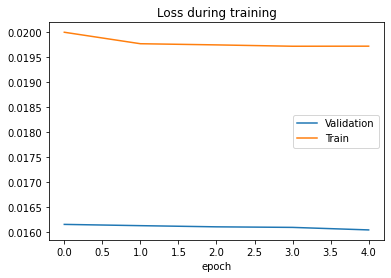

epoch 0 batch 200 loss=0.0203, MTL=0.0197, MVL=0.016				
epoch 0 batch 400 loss=0.0231, MTL=0.0196, MVL=0.016				
epoch 1 batch 600 loss=0.0177, MTL=0.0197, MVL=0.0161				
epoch 1 batch 800 loss=0.02, MTL=0.0196, MVL=0.0161				
epoch 2 batch 1000 loss=0.0195, MTL=0.0197, MVL=0.0162				
epoch 2 batch 1200 loss=0.0195, MTL=0.0196, MVL=0.0162				
epoch 3 batch 1400 loss=0.0171, MTL=0.0195, MVL=0.0161				
epoch 3 batch 1600 loss=0.0191, MTL=0.0196, MVL=0.0161				
epoch 4 batch 1800 loss=0.0205, MTL=0.0195, MVL=0.016				
epoch 4 batch 2000 loss=0.0183, MTL=0.019, MVL=0.016				
saving model MTL=0.01858994985261704, MVL=0.015955983956033985


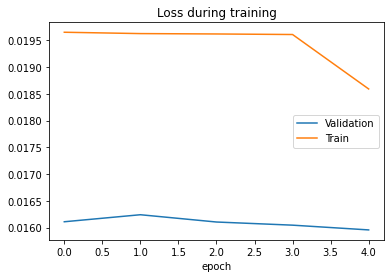

config in=10, out=5
training model my_different_model
epoch 0 batch 200 loss=0.0175, MTL=0.0187, MVL=0.0412				
epoch 0 batch 400 loss=0.0182, MTL=0.0185, MVL=0.0412				
saving model MTL=0.018439064922959783, MVL=0.015805035524192403
*epoch 1 batch 600 loss=0.018, MTL=0.0182, MVL=0.0158				
*epoch 1 batch 800 loss=0.0164, MTL=0.0179, MVL=0.0158				
saving model MTL=0.017686740121014812, MVL=0.015379245621991939
*epoch 2 batch 1000 loss=0.0167, MTL=0.0162, MVL=0.0154				
*epoch 2 batch 1200 loss=0.016, MTL=0.0162, MVL=0.0154				
epoch 3 batch 1400 loss=0.0154, MTL=0.016, MVL=0.0168				
epoch 3 batch 1600 loss=0.0152, MTL=0.016, MVL=0.0168				
epoch 4 batch 1800 loss=0.0164, MTL=0.0157, MVL=0.0182				
epoch 4 batch 2000 loss=0.0161, MTL=0.0159, MVL=0.0182				


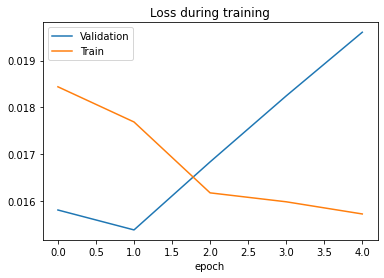

epoch 0 batch 200 loss=0.0167, MTL=0.016, MVL=0.0154				
epoch 0 batch 400 loss=0.0156, MTL=0.0161, MVL=0.0154				
epoch 1 batch 600 loss=0.0159, MTL=0.016, MVL=0.0171				
epoch 1 batch 800 loss=0.0156, MTL=0.016, MVL=0.0171				
epoch 2 batch 1000 loss=0.0158, MTL=0.0159, MVL=0.0175				
epoch 2 batch 1200 loss=0.0183, MTL=0.0159, MVL=0.0175				
epoch 3 batch 1400 loss=0.0163, MTL=0.0158, MVL=0.0177				
epoch 3 batch 1600 loss=0.0153, MTL=0.0158, MVL=0.0177				
epoch 4 batch 1800 loss=0.016, MTL=0.0159, MVL=0.0189				
epoch 4 batch 2000 loss=0.0169, MTL=0.0157, MVL=0.0189				


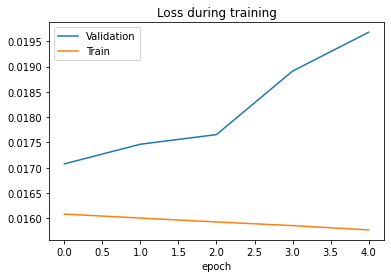

NameError: name 'plot_only' is not defined

In [8]:
'''
My interpretation of the problem:
1. create 5 different models and train them
2. pick different values of:
    - 'validate',
    - 'patience',
    - 'weight_decay',
    - 'max_epchos',
    - 'output_sequence_length',
    - 'num_layers'
'''
import aggets.model.aggregate as m_agg
import aggets.train as train

wg_tmp.input_sequence_length = 10
# 1st model

my_model = m_agg.AutoregLstmLr(dim_p + dim_d, dim_lr, num_layers=4, hidden=254,
                            output_sequence_length=7, return_deltas=False)

my_model.name = 'my_model'

# 2nd model
my_different_model = m_agg.AutoregLstmLr(dim_p + dim_d, dim_lr, num_layers=2, hidden=128,
                            output_sequence_length=5, return_deltas=False)
my_different_model.name = 'my_different_model'


# training
train.train_window_models([my_model, my_different_model], wg_tmp, patience=5, validate=True, weight_decay=0, max_epochs=5,
                          lrs=[0.001, 0.0001])

# additional options
my_model.window_config.output_sequence_length = 1
my_model.return_deltas = False

my_different_model.window_config.output_sequence_length = 1
my_different_model.return_deltas = False



# plotting


config in=10, out=5
training model model:2,128,5/5,True,0,5
epoch 0 batch 200 loss=0.0206, MTL=0.0187, MVL=0.0398				
epoch 0 batch 400 loss=0.0181, MTL=0.0185, MVL=0.0398				
saving model MTL=0.018446685137618633, MVL=0.015804569191131435
*epoch 1 batch 600 loss=0.0184, MTL=0.0182, MVL=0.0158				
*epoch 1 batch 800 loss=0.015, MTL=0.0175, MVL=0.0158				
saving model MTL=0.01737798433363713, MVL=0.015298374088816956
*epoch 2 batch 1000 loss=0.0156, MTL=0.0161, MVL=0.0153				
*epoch 2 batch 1200 loss=0.0154, MTL=0.0161, MVL=0.0153				
epoch 3 batch 1400 loss=0.0149, MTL=0.016, MVL=0.0162				
epoch 3 batch 1600 loss=0.0171, MTL=0.0158, MVL=0.0162				
epoch 4 batch 1800 loss=0.0157, MTL=0.0153, MVL=0.0174				
epoch 4 batch 2000 loss=0.015, MTL=0.0152, MVL=0.0174				


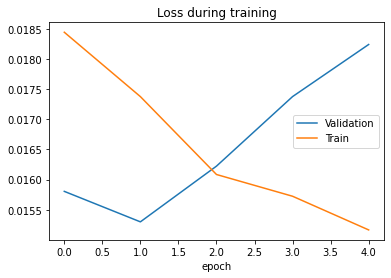

epoch 0 batch 200 loss=0.016, MTL=0.016, MVL=0.0153				
epoch 0 batch 400 loss=0.0158, MTL=0.0159, MVL=0.0153				
epoch 1 batch 600 loss=0.014, MTL=0.0159, MVL=0.0155				
epoch 1 batch 800 loss=0.0177, MTL=0.0159, MVL=0.0155				
epoch 2 batch 1000 loss=0.0146, MTL=0.0159, MVL=0.0159				
epoch 2 batch 1200 loss=0.0162, MTL=0.0158, MVL=0.0159				
epoch 3 batch 1400 loss=0.014, MTL=0.0158, MVL=0.0163				
epoch 3 batch 1600 loss=0.0154, MTL=0.0158, MVL=0.0163				
epoch 4 batch 1800 loss=0.015, MTL=0.0158, MVL=0.017				
epoch 4 batch 2000 loss=0.0147, MTL=0.0158, MVL=0.017				


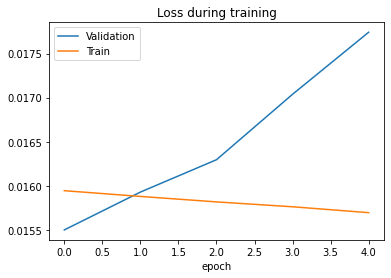

--- 203.36681604385376s seconds of training time for model:2,128,5/5,True,0,5 ---
config in=10, out=5
training model model:2,128,5/5,False,0,5
using train data set to validate
epoch 0 batch 200 loss=0.0177, MTL=0.0187, MVL=0.0421				
epoch 0 batch 400 loss=0.0182, MTL=0.0185, MVL=0.0421				
saving model MTL=0.018449681245358382, MVL=0.018184338788787984
*epoch 1 batch 600 loss=0.0181, MTL=0.0183, MVL=0.0182				
*epoch 1 batch 800 loss=0.017, MTL=0.018, MVL=0.0182				
saving model MTL=0.01773955697499164, MVL=0.01633044983546398
*epoch 2 batch 1000 loss=0.015, MTL=0.0162, MVL=0.0163				
*epoch 2 batch 1200 loss=0.0163, MTL=0.0162, MVL=0.0163				
saving model MTL=0.0161455392011594, MVL=0.016036079848060433
*epoch 3 batch 1400 loss=0.0171, MTL=0.016, MVL=0.016				
*epoch 3 batch 1600 loss=0.0153, MTL=0.016, MVL=0.016				
saving model MTL=0.015926654620513354, MVL=0.015674675659945462
*epoch 4 batch 1800 loss=0.0151, MTL=0.0155, MVL=0.0157				
*epoch 4 batch 2000 loss=0.0141, MTL=0.0154, 

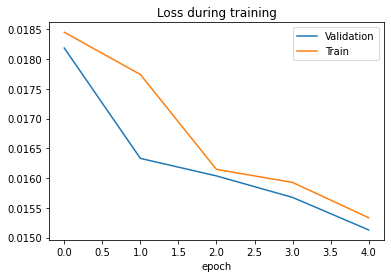

using train data set to validate
epoch 0 batch 200 loss=0.0153, MTL=0.0148, MVL=0.0151				
epoch 0 batch 400 loss=0.0136, MTL=0.0147, MVL=0.0151				
saving model MTL=0.01470354779711634, MVL=0.014585251121955986
*epoch 1 batch 600 loss=0.0156, MTL=0.0145, MVL=0.0146				
*epoch 1 batch 800 loss=0.0144, MTL=0.0145, MVL=0.0146				
saving model MTL=0.014525189832300292, MVL=0.014439784373236309
*epoch 2 batch 1000 loss=0.0145, MTL=0.0144, MVL=0.0144				
*epoch 2 batch 1200 loss=0.0123, MTL=0.0144, MVL=0.0144				
saving model MTL=0.014377716745897336, MVL=0.014302524305690794
*epoch 3 batch 1400 loss=0.014, MTL=0.0143, MVL=0.0143				
*epoch 3 batch 1600 loss=0.0141, MTL=0.0143, MVL=0.0143				
saving model MTL=0.014256522347655913, MVL=0.014245603289498192
*epoch 4 batch 1800 loss=0.0141, MTL=0.0143, MVL=0.0142				
*epoch 4 batch 2000 loss=0.0138, MTL=0.0142, MVL=0.0142				
saving model MTL=0.014165483817337704, MVL=0.014089161370973389


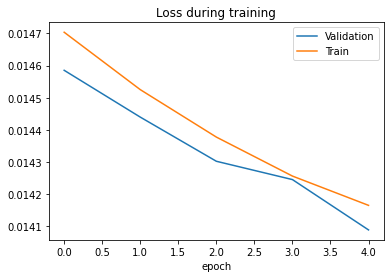

--- 288.30693650245667s seconds of training time for model:2,128,5/5,False,0,5 ---
config in=10, out=5
training model model:2,128,5/7,False,0,7
using train data set to validate
epoch 0 batch 200 loss=0.0177, MTL=0.0187, MVL=0.0421				
epoch 0 batch 400 loss=0.0181, MTL=0.0185, MVL=0.0421				
saving model MTL=0.01845235620812442, MVL=0.01820918492000662
*epoch 1 batch 600 loss=0.0181, MTL=0.0181, MVL=0.0182				
*epoch 1 batch 800 loss=0.0175, MTL=0.0177, MVL=0.0182				
saving model MTL=0.017459461992438755, MVL=0.016329285419840734
*epoch 2 batch 1000 loss=0.0156, MTL=0.0162, MVL=0.0163				
*epoch 2 batch 1200 loss=0.0164, MTL=0.0161, MVL=0.0163				
saving model MTL=0.01607254334654461, MVL=0.015972358574682103
*epoch 3 batch 1400 loss=0.0157, MTL=0.0158, MVL=0.016				
*epoch 3 batch 1600 loss=0.0173, MTL=0.0157, MVL=0.016				
saving model MTL=0.015623694421254598, MVL=0.015307587111157992
*epoch 4 batch 1800 loss=0.0145, MTL=0.0151, MVL=0.0153				
*epoch 4 batch 2000 loss=0.0167, MTL=0

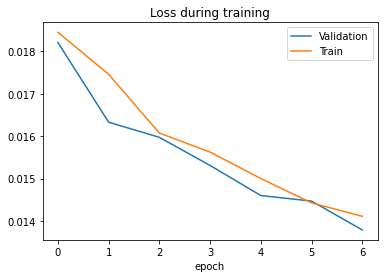

using train data set to validate
epoch 0 batch 200 loss=0.0131, MTL=0.0132, MVL=0.0138				
epoch 0 batch 400 loss=0.0121, MTL=0.0131, MVL=0.0138				
saving model MTL=0.013073170779156767, MVL=0.0128898962549263
*epoch 1 batch 600 loss=0.0119, MTL=0.0128, MVL=0.0129				
*epoch 1 batch 800 loss=0.0131, MTL=0.0128, MVL=0.0129				
saving model MTL=0.012780118664816952, MVL=0.012644435481252212
*epoch 2 batch 1000 loss=0.0118, MTL=0.0126, MVL=0.0126				
*epoch 2 batch 1200 loss=0.0127, MTL=0.0126, MVL=0.0126				
saving model MTL=0.01256201862772673, MVL=0.012413368143106856
*epoch 3 batch 1400 loss=0.0107, MTL=0.0123, MVL=0.0124				
*epoch 3 batch 1600 loss=0.0133, MTL=0.0124, MVL=0.0124				
saving model MTL=0.012352184261309357, MVL=0.012244696705225709
*epoch 4 batch 1800 loss=0.0122, MTL=0.0122, MVL=0.0122				
*epoch 4 batch 2000 loss=0.0112, MTL=0.0121, MVL=0.0122				
saving model MTL=0.012132803330899111, MVL=0.012009658611983956
*epoch 5 batch 2200 loss=0.0118, MTL=0.012, MVL=0.012			

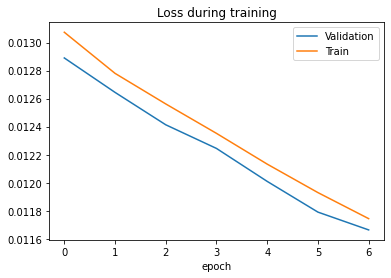

--- 402.91127157211304s seconds of training time for model:2,128,5/7,False,0,7 ---
config in=10, out=5
training model model:2,128,5/7,True,0,7
epoch 0 batch 200 loss=0.018, MTL=0.0187, MVL=0.0398				
epoch 0 batch 400 loss=0.0171, MTL=0.0185, MVL=0.0398				
saving model MTL=0.018443280301867676, MVL=0.01584574398508326
*epoch 1 batch 600 loss=0.0209, MTL=0.0181, MVL=0.0158				
*epoch 1 batch 800 loss=0.018, MTL=0.0181, MVL=0.0158				
epoch 2 batch 1000 loss=0.0174, MTL=0.0163, MVL=0.0175				
epoch 2 batch 1200 loss=0.0165, MTL=0.0162, MVL=0.0175				
epoch 3 batch 1400 loss=0.0165, MTL=0.0159, MVL=0.0161				
epoch 3 batch 1600 loss=0.0152, MTL=0.016, MVL=0.0161				
epoch 4 batch 1800 loss=0.0156, MTL=0.0156, MVL=0.0166				
epoch 4 batch 2000 loss=0.0148, MTL=0.0154, MVL=0.0166				
epoch 5 batch 2200 loss=0.0143, MTL=0.0148, MVL=0.0187				
epoch 5 batch 2400 loss=0.0135, MTL=0.0146, MVL=0.0187				
epoch 6 batch 2600 loss=0.0145, MTL=0.0143, MVL=0.0169				
epoch 6 batch 2800 loss=0.0136, 

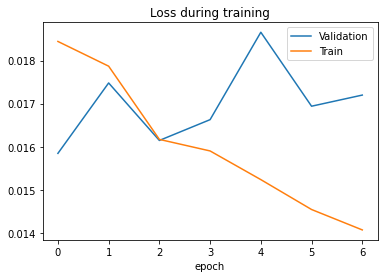

epoch 0 batch 200 loss=0.0176, MTL=0.0181, MVL=0.0158				
epoch 0 batch 400 loss=0.0192, MTL=0.0181, MVL=0.0158				
saving model MTL=0.018135246579851484, MVL=0.015786314749571144
*epoch 1 batch 600 loss=0.0179, MTL=0.018, MVL=0.0158				
*epoch 1 batch 800 loss=0.0201, MTL=0.0181, MVL=0.0158				
saving model MTL=0.01811438388305159, MVL=0.015704185182808854
*epoch 2 batch 1000 loss=0.0186, MTL=0.0181, MVL=0.0157				
*epoch 2 batch 1200 loss=0.0174, MTL=0.0174, MVL=0.0157				
saving model MTL=0.0172319549563885, MVL=0.015193673308755531
*epoch 3 batch 1400 loss=0.0155, MTL=0.0162, MVL=0.0152				
*epoch 3 batch 1600 loss=0.016, MTL=0.0161, MVL=0.0152				
epoch 4 batch 1800 loss=0.0158, MTL=0.0159, MVL=0.0163				
epoch 4 batch 2000 loss=0.0158, MTL=0.0159, MVL=0.0163				
epoch 5 batch 2200 loss=0.0161, MTL=0.0158, MVL=0.0166				
epoch 5 batch 2400 loss=0.0158, MTL=0.0158, MVL=0.0166				
epoch 6 batch 2600 loss=0.0146, MTL=0.0155, MVL=0.0168				
epoch 6 batch 2800 loss=0.0168, MTL=0.0156, 

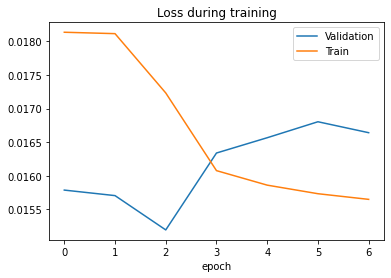

--- 295.21958684921265s seconds of training time for model:2,128,5/7,True,0,7 ---
config in=10, out=5
training model model:2,128,5/5,True,0.1,5
epoch 0 batch 200 loss=0.0185, MTL=0.0201, MVL=0.0399				
epoch 0 batch 400 loss=0.0168, MTL=0.0191, MVL=0.0399				
saving model MTL=0.019056708186297025, MVL=0.015774097614234588
*epoch 1 batch 600 loss=0.0178, MTL=0.0182, MVL=0.0158				
*epoch 1 batch 800 loss=0.0169, MTL=0.0181, MVL=0.0158				
saving model MTL=0.01814397838285008, MVL=0.01575308409137804
*epoch 2 batch 1000 loss=0.0181, MTL=0.0182, MVL=0.0158				
*epoch 2 batch 1200 loss=0.0201, MTL=0.0182, MVL=0.0158				
epoch 3 batch 1400 loss=0.0182, MTL=0.018, MVL=0.0158				
epoch 3 batch 1600 loss=0.0187, MTL=0.0181, MVL=0.0158				
saving model MTL=0.018145456871417873, MVL=0.015744021498277538
*epoch 4 batch 1800 loss=0.0176, MTL=0.018, MVL=0.0157				
*epoch 4 batch 2000 loss=0.0162, MTL=0.0181, MVL=0.0157				


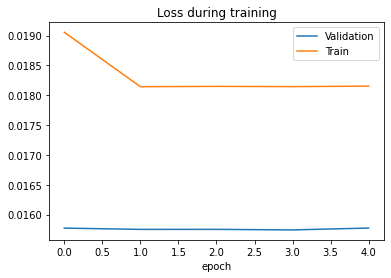

epoch 0 batch 200 loss=0.0188, MTL=0.0181, MVL=0.0157				
epoch 0 batch 400 loss=0.0177, MTL=0.0181, MVL=0.0157				
saving model MTL=0.018130803743149338, MVL=0.01573317421630758
*epoch 1 batch 600 loss=0.0196, MTL=0.0182, MVL=0.0157				
*epoch 1 batch 800 loss=0.0168, MTL=0.0181, MVL=0.0157				
saving model MTL=0.01812852134037651, MVL=0.015707464308523742
*epoch 2 batch 1000 loss=0.0178, MTL=0.0182, MVL=0.0157				
*epoch 2 batch 1200 loss=0.0176, MTL=0.0181, MVL=0.0157				
saving model MTL=0.018129113575499546, MVL=0.01569428876591999
*epoch 3 batch 1400 loss=0.0176, MTL=0.0181, MVL=0.0157				
*epoch 3 batch 1600 loss=0.0192, MTL=0.0181, MVL=0.0157				
epoch 4 batch 1800 loss=0.0186, MTL=0.0182, MVL=0.0157				
epoch 4 batch 2000 loss=0.0182, MTL=0.0182, MVL=0.0157				


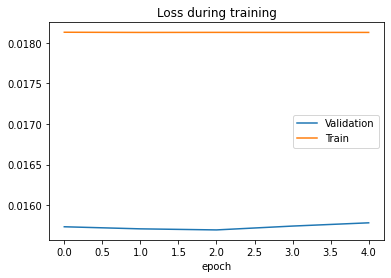

--- 861.2457089424133s seconds of training time for model:2,128,5/5,True,0.1,5 ---
config in=10, out=5
training model model:3,128,5/5,True,0,5
epoch 0 batch 200 loss=0.019, MTL=0.0192, MVL=0.0572				
epoch 0 batch 400 loss=0.0192, MTL=0.0187, MVL=0.0572				
saving model MTL=0.018697487788304996, MVL=0.01581512993110008
*epoch 1 batch 600 loss=0.019, MTL=0.0182, MVL=0.0158				
*epoch 1 batch 800 loss=0.0179, MTL=0.0182, MVL=0.0158				
epoch 2 batch 1000 loss=0.0175, MTL=0.0183, MVL=0.0159				
epoch 2 batch 1200 loss=0.0155, MTL=0.0183, MVL=0.0159				
epoch 3 batch 1400 loss=0.0189, MTL=0.0182, MVL=0.0158				
epoch 3 batch 1600 loss=0.0185, MTL=0.0182, MVL=0.0158				
epoch 4 batch 1800 loss=0.0174, MTL=0.018, MVL=0.0159				
epoch 4 batch 2000 loss=0.0214, MTL=0.0182, MVL=0.0159				


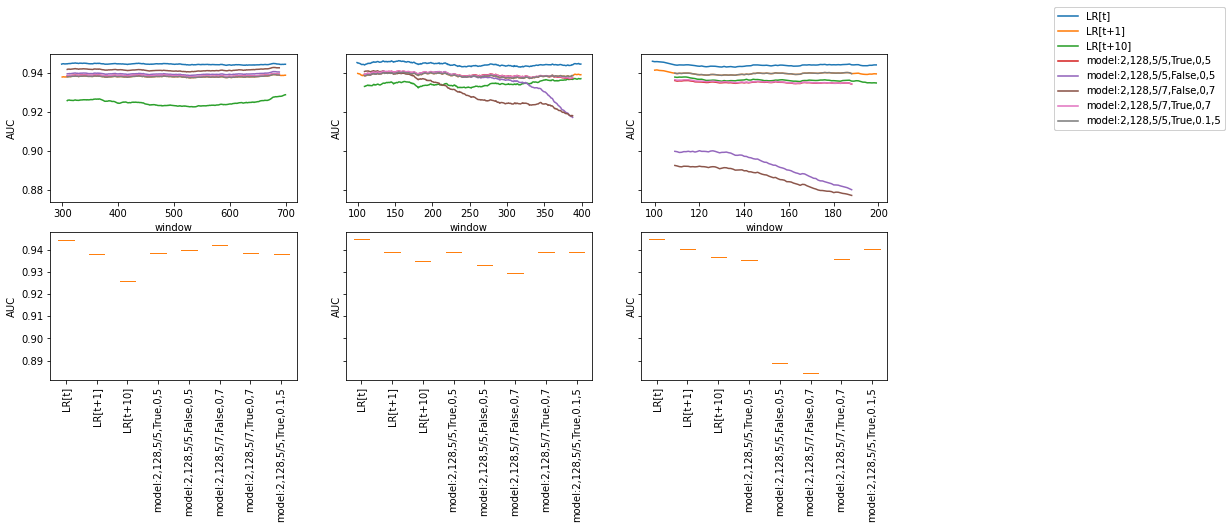

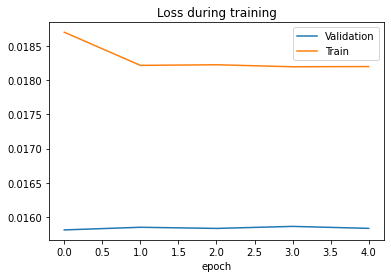

epoch 0 batch 200 loss=0.0185, MTL=0.0181, MVL=0.0158				
epoch 0 batch 400 loss=0.0179, MTL=0.0181, MVL=0.0158				
saving model MTL=0.01813855905120216, MVL=0.015769467215801847
*epoch 1 batch 600 loss=0.0185, MTL=0.0182, MVL=0.0158				
*epoch 1 batch 800 loss=0.015, MTL=0.0182, MVL=0.0158				
saving model MTL=0.01813802121779247, MVL=0.015690612270817406
*epoch 2 batch 1000 loss=0.0167, MTL=0.0183, MVL=0.0157				
*epoch 2 batch 1200 loss=0.0189, MTL=0.0181, MVL=0.0157				
epoch 3 batch 1400 loss=0.0187, MTL=0.0182, MVL=0.0158				
epoch 3 batch 1600 loss=0.0183, MTL=0.0182, MVL=0.0158				
epoch 4 batch 1800 loss=0.0187, MTL=0.0182, MVL=0.0158				
epoch 4 batch 2000 loss=0.0198, MTL=0.0181, MVL=0.0158				


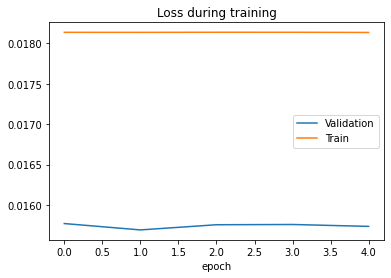

--- 300.367493391037s seconds of training time for model:3,128,5/5,True,0,5 ---
config in=10, out=5
training model model:3,128,5/5,False,0,5
using train data set to validate
epoch 0 batch 200 loss=0.0191, MTL=0.0193, MVL=0.0596				
epoch 0 batch 400 loss=0.018, MTL=0.0188, MVL=0.0596				
saving model MTL=0.018710181385915358, MVL=0.01816731482511924
*epoch 1 batch 600 loss=0.0196, MTL=0.0183, MVL=0.0182				
*epoch 1 batch 800 loss=0.0171, MTL=0.0182, MVL=0.0182				
epoch 2 batch 1000 loss=0.0179, MTL=0.0182, MVL=0.0182				
epoch 2 batch 1200 loss=0.017, MTL=0.0182, MVL=0.0182				
epoch 3 batch 1400 loss=0.0167, MTL=0.0182, MVL=0.0182				
epoch 3 batch 1600 loss=0.0199, MTL=0.0182, MVL=0.0182				
epoch 4 batch 1800 loss=0.0166, MTL=0.0182, MVL=0.0182				
epoch 4 batch 2000 loss=0.0181, MTL=0.0182, MVL=0.0182				


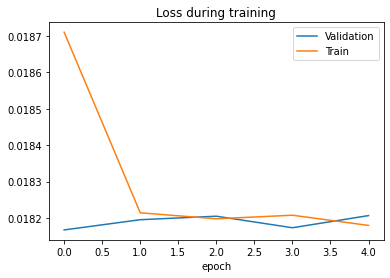

using train data set to validate
epoch 0 batch 200 loss=0.0184, MTL=0.0182, MVL=0.0182				
epoch 0 batch 400 loss=0.0187, MTL=0.0181, MVL=0.0182				
saving model MTL=0.01813996601935829, MVL=0.018136672843376705
*epoch 1 batch 600 loss=0.0172, MTL=0.0181, MVL=0.0181				
*epoch 1 batch 800 loss=0.0177, MTL=0.0181, MVL=0.0181				
epoch 2 batch 1000 loss=0.0178, MTL=0.0181, MVL=0.0181				
epoch 2 batch 1200 loss=0.0169, MTL=0.0182, MVL=0.0181				
epoch 3 batch 1400 loss=0.0201, MTL=0.0181, MVL=0.0182				
epoch 3 batch 1600 loss=0.0182, MTL=0.0181, MVL=0.0182				
saving model MTL=0.018138039183929804, MVL=0.018130371519138575
*epoch 4 batch 1800 loss=0.0173, MTL=0.018, MVL=0.0181				
*epoch 4 batch 2000 loss=0.0187, MTL=0.0181, MVL=0.0181				


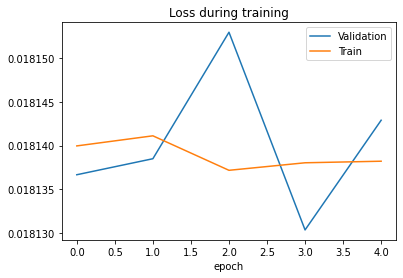

--- 399.1853241920471s seconds of training time for model:3,128,5/5,False,0,5 ---
config in=10, out=5
training model model:3,128,5/7,False,0,7
using train data set to validate
epoch 0 batch 200 loss=0.018, MTL=0.0192, MVL=0.0596				
epoch 0 batch 400 loss=0.0189, MTL=0.0188, MVL=0.0596				
saving model MTL=0.018708973563777383, MVL=0.01816454792812501
*epoch 1 batch 600 loss=0.018, MTL=0.0182, MVL=0.0182				
*epoch 1 batch 800 loss=0.0188, MTL=0.0182, MVL=0.0182				
epoch 2 batch 1000 loss=0.0176, MTL=0.0182, MVL=0.0183				
epoch 2 batch 1200 loss=0.0162, MTL=0.0182, MVL=0.0183				
epoch 3 batch 1400 loss=0.0156, MTL=0.0181, MVL=0.0182				
epoch 3 batch 1600 loss=0.0186, MTL=0.0182, MVL=0.0182				
epoch 4 batch 1800 loss=0.0172, MTL=0.0185, MVL=0.0182				
epoch 4 batch 2000 loss=0.0181, MTL=0.0182, MVL=0.0182				
epoch 5 batch 2200 loss=0.0191, MTL=0.0181, MVL=0.0182				
epoch 5 batch 2400 loss=0.0194, MTL=0.0182, MVL=0.0182				
epoch 6 batch 2600 loss=0.0174, MTL=0.0171, MVL=0.0182			

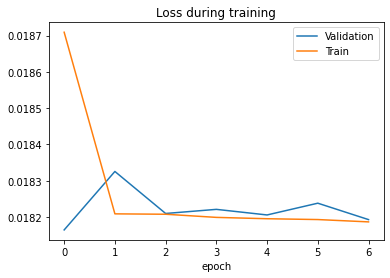

using train data set to validate
epoch 0 batch 200 loss=0.0182, MTL=0.0181, MVL=0.0182				
epoch 0 batch 400 loss=0.019, MTL=0.0181, MVL=0.0182				
saving model MTL=0.018139263888171445, MVL=0.018139206821542003
*epoch 1 batch 600 loss=0.0177, MTL=0.0181, MVL=0.0181				
*epoch 1 batch 800 loss=0.0182, MTL=0.0181, MVL=0.0181				
saving model MTL=0.018139102793025504, MVL=0.01813012316788592
*epoch 2 batch 1000 loss=0.0182, MTL=0.018, MVL=0.0181				
*epoch 2 batch 1200 loss=0.0171, MTL=0.0181, MVL=0.0181				
epoch 3 batch 1400 loss=0.0189, MTL=0.0183, MVL=0.0181				
epoch 3 batch 1600 loss=0.0189, MTL=0.0182, MVL=0.0181				
epoch 4 batch 1800 loss=0.0147, MTL=0.0178, MVL=0.0181				
epoch 4 batch 2000 loss=0.0186, MTL=0.0182, MVL=0.0181				
epoch 5 batch 2200 loss=0.0171, MTL=0.018, MVL=0.0181				
epoch 5 batch 2400 loss=0.0196, MTL=0.0182, MVL=0.0181				
saving model MTL=0.018141061880606428, MVL=0.018127375015640507
*epoch 6 batch 2600 loss=0.0164, MTL=0.0173, MVL=0.0181				
*epoch 6 ba

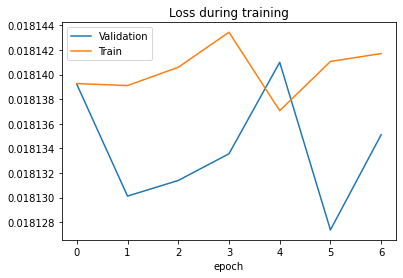

--- 543.5138297080994s seconds of training time for model:3,128,5/7,False,0,7 ---
config in=10, out=5
training model model:3,128,5/7,True,0,7
epoch 0 batch 200 loss=0.0162, MTL=0.0193, MVL=0.0573				
epoch 0 batch 400 loss=0.0188, MTL=0.0188, MVL=0.0573				
saving model MTL=0.01872663731164112, MVL=0.01580447564664923
*epoch 1 batch 600 loss=0.0181, MTL=0.0182, MVL=0.0158				
*epoch 1 batch 800 loss=0.02, MTL=0.0182, MVL=0.0158				
epoch 2 batch 1000 loss=0.0193, MTL=0.0182, MVL=0.0159				
epoch 2 batch 1200 loss=0.0209, MTL=0.0182, MVL=0.0159				
saving model MTL=0.018206877825355832, MVL=0.015712329217034283
*epoch 3 batch 1400 loss=0.016, MTL=0.0179, MVL=0.0157				
*epoch 3 batch 1600 loss=0.018, MTL=0.0181, MVL=0.0157				
epoch 4 batch 1800 loss=0.0178, MTL=0.018, MVL=0.0158				
epoch 4 batch 2000 loss=0.0174, MTL=0.0181, MVL=0.0158				
epoch 5 batch 2200 loss=0.0166, MTL=0.0181, MVL=0.0158				
epoch 5 batch 2400 loss=0.0175, MTL=0.0183, MVL=0.0158				
epoch 6 batch 2600 loss=0.018

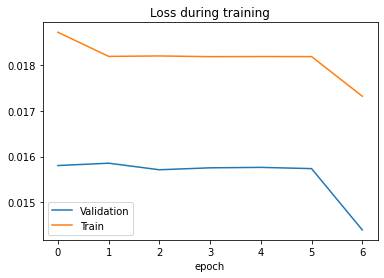

epoch 0 batch 200 loss=0.0164, MTL=0.0161, MVL=0.0144				
epoch 0 batch 400 loss=0.0149, MTL=0.016, MVL=0.0144				
epoch 1 batch 600 loss=0.0156, MTL=0.0159, MVL=0.0145				
epoch 1 batch 800 loss=0.0167, MTL=0.0159, MVL=0.0145				
saving model MTL=0.015930913309147258, MVL=0.014330225263829113
*epoch 2 batch 1000 loss=0.0169, MTL=0.016, MVL=0.0143				
*epoch 2 batch 1200 loss=0.0165, MTL=0.0159, MVL=0.0143				
epoch 3 batch 1400 loss=0.0148, MTL=0.0159, MVL=0.0145				
epoch 3 batch 1600 loss=0.0167, MTL=0.0158, MVL=0.0145				
epoch 4 batch 1800 loss=0.0147, MTL=0.0159, MVL=0.0148				
epoch 4 batch 2000 loss=0.0165, MTL=0.0158, MVL=0.0148				
epoch 5 batch 2200 loss=0.0163, MTL=0.0157, MVL=0.0149				
epoch 5 batch 2400 loss=0.017, MTL=0.0158, MVL=0.0149				
epoch 6 batch 2600 loss=0.0164, MTL=0.0159, MVL=0.0151				
epoch 6 batch 2800 loss=0.0149, MTL=0.0157, MVL=0.0151				
epoch 6 batch 3000 loss=0.0159, MTL=0.0158, MVL=0.0151				


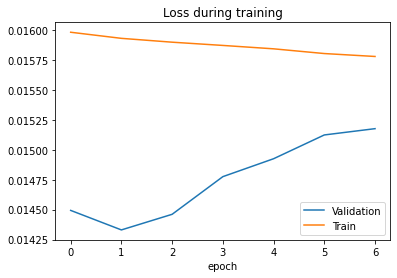

--- 411.23260831832886s seconds of training time for model:3,128,5/7,True,0,7 ---
config in=10, out=5
training model model:3,128,5/5,True,0.1,5
epoch 0 batch 200 loss=0.0182, MTL=0.0221, MVL=0.0571				
epoch 0 batch 400 loss=0.0158, MTL=0.0201, MVL=0.0571				
saving model MTL=0.019972681762611893, MVL=0.015743300868350952
*epoch 1 batch 600 loss=0.0195, MTL=0.0179, MVL=0.0157				
*epoch 1 batch 800 loss=0.0183, MTL=0.0181, MVL=0.0157				
epoch 2 batch 1000 loss=0.0169, MTL=0.0181, MVL=0.0158				
epoch 2 batch 1200 loss=0.0188, MTL=0.0182, MVL=0.0158				
epoch 3 batch 1400 loss=0.0193, MTL=0.018, MVL=0.0158				
epoch 3 batch 1600 loss=0.0194, MTL=0.0182, MVL=0.0158				
saving model MTL=0.01814787709272486, MVL=0.01572878200744019
*epoch 4 batch 1800 loss=0.0162, MTL=0.018, MVL=0.0157				
*epoch 4 batch 2000 loss=0.019, MTL=0.0181, MVL=0.0157				


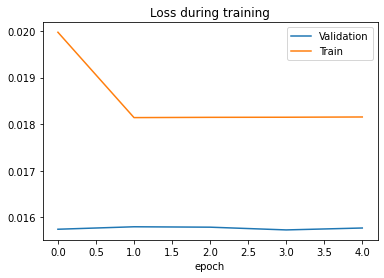

epoch 0 batch 200 loss=0.0206, MTL=0.0181, MVL=0.0158				
epoch 0 batch 400 loss=0.0197, MTL=0.0182, MVL=0.0158				
epoch 1 batch 600 loss=0.0183, MTL=0.0181, MVL=0.0157				
epoch 1 batch 800 loss=0.0152, MTL=0.0181, MVL=0.0157				
epoch 2 batch 1000 loss=0.0181, MTL=0.0182, MVL=0.0157				
epoch 2 batch 1200 loss=0.0176, MTL=0.0181, MVL=0.0157				
saving model MTL=0.018127581457377306, MVL=0.0157091867819917
*epoch 3 batch 1400 loss=0.0182, MTL=0.0182, MVL=0.0157				
*epoch 3 batch 1600 loss=0.02, MTL=0.0181, MVL=0.0157				
epoch 4 batch 1800 loss=0.017, MTL=0.018, MVL=0.0158				
epoch 4 batch 2000 loss=0.0185, MTL=0.0181, MVL=0.0158				


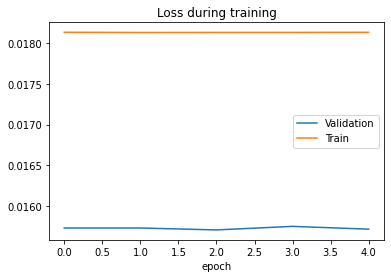

--- 1585.2849757671356s seconds of training time for model:3,128,5/5,True,0.1,5 ---
config in=10, out=5
training model model:4,64,5/5,True,0,5
epoch 0 batch 200 loss=0.0171, MTL=0.0227, MVL=0.105				
epoch 0 batch 400 loss=0.0166, MTL=0.0204, MVL=0.105				
saving model MTL=0.02025102962488115, MVL=0.015934114451291132
*epoch 1 batch 600 loss=0.0172, MTL=0.0182, MVL=0.0159				
*epoch 1 batch 800 loss=0.0177, MTL=0.0182, MVL=0.0159				
saving model MTL=0.018201392163322512, MVL=0.01579497357616659
*epoch 2 batch 1000 loss=0.0173, MTL=0.0182, MVL=0.0158				
*epoch 2 batch 1200 loss=0.0202, MTL=0.0183, MVL=0.0158				
epoch 3 batch 1400 loss=0.0169, MTL=0.0181, MVL=0.0159				
epoch 3 batch 1600 loss=0.0196, MTL=0.0181, MVL=0.0159				
saving model MTL=0.018202345261208317, MVL=0.01575352508025091
*epoch 4 batch 1800 loss=0.0168, MTL=0.0182, MVL=0.0158				
*epoch 4 batch 2000 loss=0.0168, MTL=0.0182, MVL=0.0158				


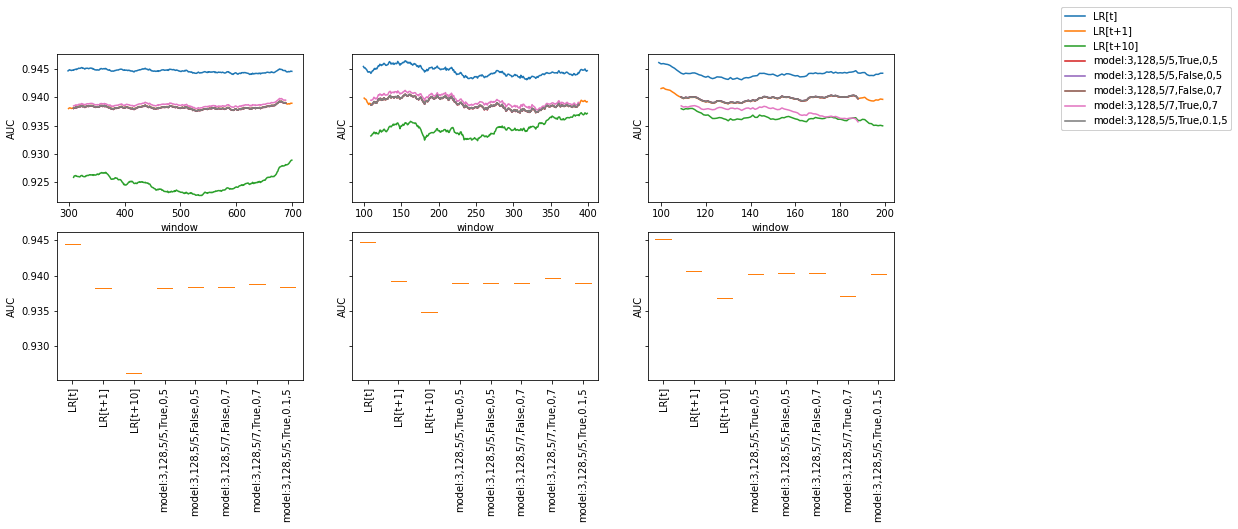

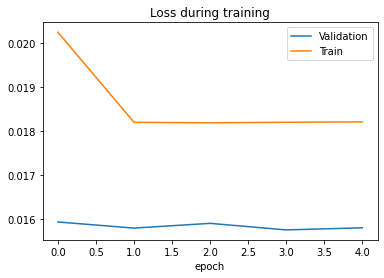

epoch 0 batch 200 loss=0.0172, MTL=0.0181, MVL=0.0158				
epoch 0 batch 400 loss=0.0198, MTL=0.0182, MVL=0.0158				
epoch 1 batch 600 loss=0.0169, MTL=0.0182, MVL=0.0158				
epoch 1 batch 800 loss=0.0165, MTL=0.0181, MVL=0.0158				
saving model MTL=0.018135006694385555, MVL=0.015721653557581004
*epoch 2 batch 1000 loss=0.0173, MTL=0.0182, MVL=0.0157				
*epoch 2 batch 1200 loss=0.0174, MTL=0.0181, MVL=0.0157				
saving model MTL=0.01813466111993886, MVL=0.015694120059125734
*epoch 3 batch 1400 loss=0.018, MTL=0.0181, MVL=0.0157				
*epoch 3 batch 1600 loss=0.0196, MTL=0.0181, MVL=0.0157				
epoch 4 batch 1800 loss=0.0177, MTL=0.0179, MVL=0.0157				
epoch 4 batch 2000 loss=0.0182, MTL=0.0181, MVL=0.0157				


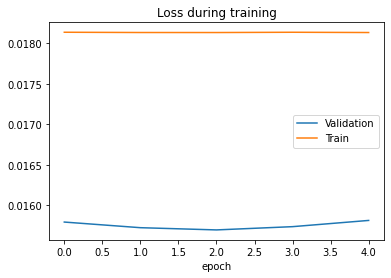

--- 254.634375333786s seconds of training time for model:4,64,5/5,True,0,5 ---
config in=10, out=5
training model model:4,64,5/5,False,0,5
using train data set to validate
epoch 0 batch 200 loss=0.0179, MTL=0.0227, MVL=0.106				
epoch 0 batch 400 loss=0.0178, MTL=0.0205, MVL=0.106				
saving model MTL=0.02028545509275333, MVL=0.01821143590731172
*epoch 1 batch 600 loss=0.0181, MTL=0.0182, MVL=0.0182				
*epoch 1 batch 800 loss=0.0184, MTL=0.0182, MVL=0.0182				
epoch 2 batch 1000 loss=0.0171, MTL=0.0181, MVL=0.0182				
epoch 2 batch 1200 loss=0.0153, MTL=0.0182, MVL=0.0182				
saving model MTL=0.018210908832506, MVL=0.018198163416365692
*epoch 3 batch 1400 loss=0.0177, MTL=0.0182, MVL=0.0182				
*epoch 3 batch 1600 loss=0.019, MTL=0.0183, MVL=0.0182				
saving model MTL=0.018209081667950742, MVL=0.018182978485700163
*epoch 4 batch 1800 loss=0.0186, MTL=0.0182, MVL=0.0182				
*epoch 4 batch 2000 loss=0.0189, MTL=0.0181, MVL=0.0182				


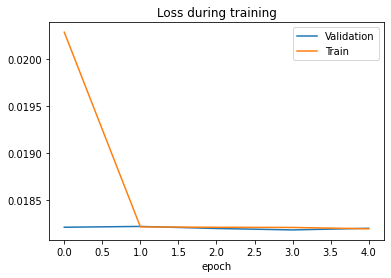

using train data set to validate
epoch 0 batch 200 loss=0.0174, MTL=0.018, MVL=0.0182				
epoch 0 batch 400 loss=0.0175, MTL=0.0181, MVL=0.0182				
saving model MTL=0.018138300494116667, MVL=0.01813513856579057
*epoch 1 batch 600 loss=0.0196, MTL=0.0181, MVL=0.0181				
*epoch 1 batch 800 loss=0.0168, MTL=0.0181, MVL=0.0181				
saving model MTL=0.018136777691371033, MVL=0.0181264444974877
*epoch 2 batch 1000 loss=0.0169, MTL=0.0182, MVL=0.0181				
*epoch 2 batch 1200 loss=0.0205, MTL=0.0182, MVL=0.0181				
epoch 3 batch 1400 loss=0.0167, MTL=0.0182, MVL=0.0181				
epoch 3 batch 1600 loss=0.019, MTL=0.0182, MVL=0.0181				
epoch 4 batch 1800 loss=0.0182, MTL=0.0181, MVL=0.0181				
epoch 4 batch 2000 loss=0.0189, MTL=0.0181, MVL=0.0181				


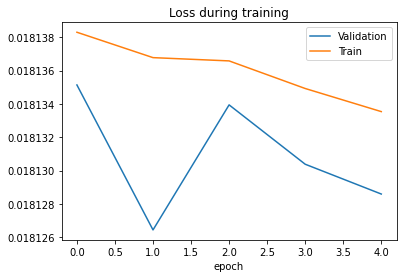

--- 353.8803346157074s seconds of training time for model:4,64,5/5,False,0,5 ---
config in=10, out=5
training model model:4,64,5/7,False,0,7
using train data set to validate
epoch 0 batch 200 loss=0.0175, MTL=0.0225, MVL=0.106				
epoch 0 batch 400 loss=0.0178, MTL=0.0204, MVL=0.106				
saving model MTL=0.02023938255208194, MVL=0.018180693093231313
*epoch 1 batch 600 loss=0.0178, MTL=0.0181, MVL=0.0182				
*epoch 1 batch 800 loss=0.0178, MTL=0.0182, MVL=0.0182				
epoch 2 batch 1000 loss=0.019, MTL=0.0183, MVL=0.0182				
epoch 2 batch 1200 loss=0.0178, MTL=0.0183, MVL=0.0182				
saving model MTL=0.01820403230365787, MVL=0.018154728884526957
*epoch 3 batch 1400 loss=0.0186, MTL=0.0181, MVL=0.0182				
*epoch 3 batch 1600 loss=0.0181, MTL=0.0182, MVL=0.0182				
epoch 4 batch 1800 loss=0.0176, MTL=0.018, MVL=0.0182				
epoch 4 batch 2000 loss=0.0174, MTL=0.0182, MVL=0.0182				
epoch 5 batch 2200 loss=0.0164, MTL=0.018, MVL=0.0182				
epoch 5 batch 2400 loss=0.0171, MTL=0.0181, MVL=0.0182		

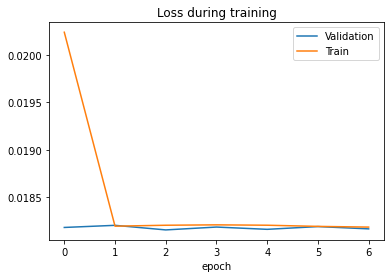

using train data set to validate
epoch 0 batch 200 loss=0.0181, MTL=0.0182, MVL=0.0182				
epoch 0 batch 400 loss=0.0172, MTL=0.0182, MVL=0.0182				
saving model MTL=0.01813705446409367, MVL=0.018145548459357532
*epoch 1 batch 600 loss=0.0178, MTL=0.0181, MVL=0.0181				
*epoch 1 batch 800 loss=0.0191, MTL=0.0181, MVL=0.0181				
saving model MTL=0.018137235314892843, MVL=0.01813808156663496
*epoch 2 batch 1000 loss=0.0175, MTL=0.018, MVL=0.0181				
*epoch 2 batch 1200 loss=0.0205, MTL=0.0182, MVL=0.0181				
epoch 3 batch 1400 loss=0.0174, MTL=0.0182, MVL=0.0181				
epoch 3 batch 1600 loss=0.0184, MTL=0.0181, MVL=0.0181				
epoch 4 batch 1800 loss=0.019, MTL=0.0183, MVL=0.0181				
epoch 4 batch 2000 loss=0.0165, MTL=0.0181, MVL=0.0181				
saving model MTL=0.01813454555850863, MVL=0.018131631142599615
*epoch 5 batch 2200 loss=0.0189, MTL=0.0181, MVL=0.0181				
*epoch 5 batch 2400 loss=0.0197, MTL=0.0182, MVL=0.0181				
epoch 6 batch 2600 loss=0.0186, MTL=0.0187, MVL=0.0181				
epoch 6 bat

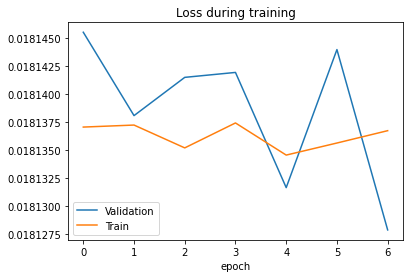

--- 495.85120272636414s seconds of training time for model:4,64,5/7,False,0,7 ---
config in=10, out=5
training model model:4,64,5/7,True,0,7
epoch 0 batch 200 loss=0.0175, MTL=0.0228, MVL=0.105				
epoch 0 batch 400 loss=0.0195, MTL=0.0205, MVL=0.105				
saving model MTL=0.020331158739349032, MVL=0.015770280260409487
*epoch 1 batch 600 loss=0.0177, MTL=0.0182, MVL=0.0158				
*epoch 1 batch 800 loss=0.0214, MTL=0.0182, MVL=0.0158				
epoch 2 batch 1000 loss=0.0194, MTL=0.0182, MVL=0.0158				
epoch 2 batch 1200 loss=0.0173, MTL=0.0181, MVL=0.0158				
epoch 3 batch 1400 loss=0.0168, MTL=0.0183, MVL=0.0158				
epoch 3 batch 1600 loss=0.0196, MTL=0.0182, MVL=0.0158				
epoch 4 batch 1800 loss=0.0184, MTL=0.0183, MVL=0.0158				
epoch 4 batch 2000 loss=0.0161, MTL=0.0182, MVL=0.0158				
epoch 5 batch 2200 loss=0.0187, MTL=0.0181, MVL=0.0158				
epoch 5 batch 2400 loss=0.0172, MTL=0.0182, MVL=0.0158				
saving model MTL=0.018199305443682517, MVL=0.015767145108004085
*epoch 6 batch 2600 loss=0.

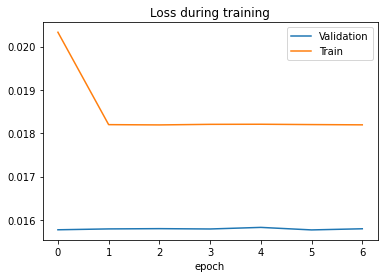

epoch 0 batch 200 loss=0.0191, MTL=0.0182, MVL=0.0158				
epoch 0 batch 400 loss=0.0181, MTL=0.0181, MVL=0.0158				
saving model MTL=0.01813555202569477, MVL=0.0157241324939933
*epoch 1 batch 600 loss=0.016, MTL=0.0182, MVL=0.0157				
*epoch 1 batch 800 loss=0.0188, MTL=0.0182, MVL=0.0157				
epoch 2 batch 1000 loss=0.0172, MTL=0.0182, MVL=0.0159				
epoch 2 batch 1200 loss=0.0187, MTL=0.0182, MVL=0.0159				
epoch 3 batch 1400 loss=0.0169, MTL=0.0184, MVL=0.0158				
epoch 3 batch 1600 loss=0.0193, MTL=0.0182, MVL=0.0158				
epoch 4 batch 1800 loss=0.0192, MTL=0.0182, MVL=0.0157				
epoch 4 batch 2000 loss=0.0203, MTL=0.0182, MVL=0.0157				
epoch 5 batch 2200 loss=0.0176, MTL=0.0183, MVL=0.0157				
epoch 5 batch 2400 loss=0.0195, MTL=0.0182, MVL=0.0157				
epoch 6 batch 2600 loss=0.0177, MTL=0.0186, MVL=0.0158				
epoch 6 batch 2800 loss=0.0185, MTL=0.0181, MVL=0.0158				
epoch 6 batch 3000 loss=0.0173, MTL=0.0181, MVL=0.0158				
saving model MTL=0.01813558418966193, MVL=0.0156985401007

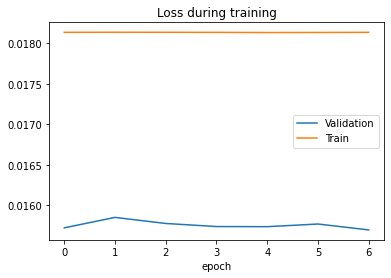

--- 359.6086483001709s seconds of training time for model:4,64,5/7,True,0,7 ---
config in=10, out=5
training model model:4,64,5/5,True,0.1,5
epoch 0 batch 200 loss=0.0199, MTL=0.0308, MVL=0.105				
epoch 0 batch 400 loss=0.0182, MTL=0.0245, MVL=0.105				
saving model MTL=0.024010509983840772, MVL=0.01581000242015866
*epoch 1 batch 600 loss=0.0171, MTL=0.0181, MVL=0.0158				
*epoch 1 batch 800 loss=0.017, MTL=0.0181, MVL=0.0158				
saving model MTL=0.018141631604824, MVL=0.015741399779427248
*epoch 2 batch 1000 loss=0.0194, MTL=0.0181, MVL=0.0157				
*epoch 2 batch 1200 loss=0.0172, MTL=0.0181, MVL=0.0157				
saving model MTL=0.018138840712830596, MVL=0.015729934557295235
*epoch 3 batch 1400 loss=0.0172, MTL=0.0183, MVL=0.0157				
*epoch 3 batch 1600 loss=0.0171, MTL=0.0182, MVL=0.0157				
epoch 4 batch 1800 loss=0.0184, MTL=0.0182, MVL=0.0158				
epoch 4 batch 2000 loss=0.0186, MTL=0.0181, MVL=0.0158				


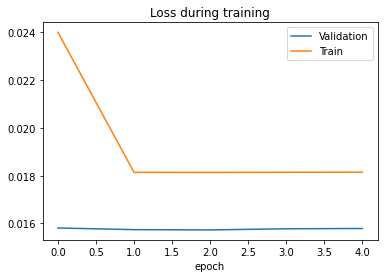

epoch 0 batch 200 loss=0.018, MTL=0.0181, MVL=0.0157				
epoch 0 batch 400 loss=0.018, MTL=0.0181, MVL=0.0157				
epoch 1 batch 600 loss=0.0191, MTL=0.0181, MVL=0.0159				
epoch 1 batch 800 loss=0.0183, MTL=0.0181, MVL=0.0159				
epoch 2 batch 1000 loss=0.0174, MTL=0.0181, MVL=0.0158				
epoch 2 batch 1200 loss=0.0185, MTL=0.0182, MVL=0.0158				
epoch 3 batch 1400 loss=0.0182, MTL=0.0182, MVL=0.0158				
epoch 3 batch 1600 loss=0.0197, MTL=0.0182, MVL=0.0158				
epoch 4 batch 1800 loss=0.0176, MTL=0.0182, MVL=0.0158				
epoch 4 batch 2000 loss=0.017, MTL=0.0182, MVL=0.0158				
saving model MTL=0.018128718133353334, MVL=0.015693331366313287


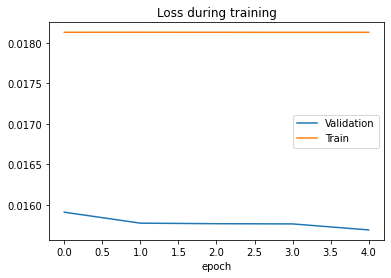

--- 601.9818069934845s seconds of training time for model:4,64,5/5,True,0.1,5 ---
config in=10, out=5
training model model:2,254,5/5,True,0,5
epoch 0 batch 200 loss=0.0183, MTL=0.0185, MVL=0.035				
epoch 0 batch 400 loss=0.0178, MTL=0.0184, MVL=0.035				
saving model MTL=0.018365038610461404, MVL=0.015759981771717307
*epoch 1 batch 600 loss=0.0167, MTL=0.0173, MVL=0.0158				
*epoch 1 batch 800 loss=0.0165, MTL=0.0167, MVL=0.0158				
epoch 2 batch 1000 loss=0.0165, MTL=0.0161, MVL=0.0188				
epoch 2 batch 1200 loss=0.0181, MTL=0.0161, MVL=0.0188				
saving model MTL=0.01606122919683093, MVL=0.01458105545674191
*epoch 3 batch 1400 loss=0.0155, MTL=0.016, MVL=0.0146				
*epoch 3 batch 1600 loss=0.0162, MTL=0.016, MVL=0.0146				
epoch 4 batch 1800 loss=0.0145, MTL=0.0159, MVL=0.0165				
epoch 4 batch 2000 loss=0.0159, MTL=0.0156, MVL=0.0165				


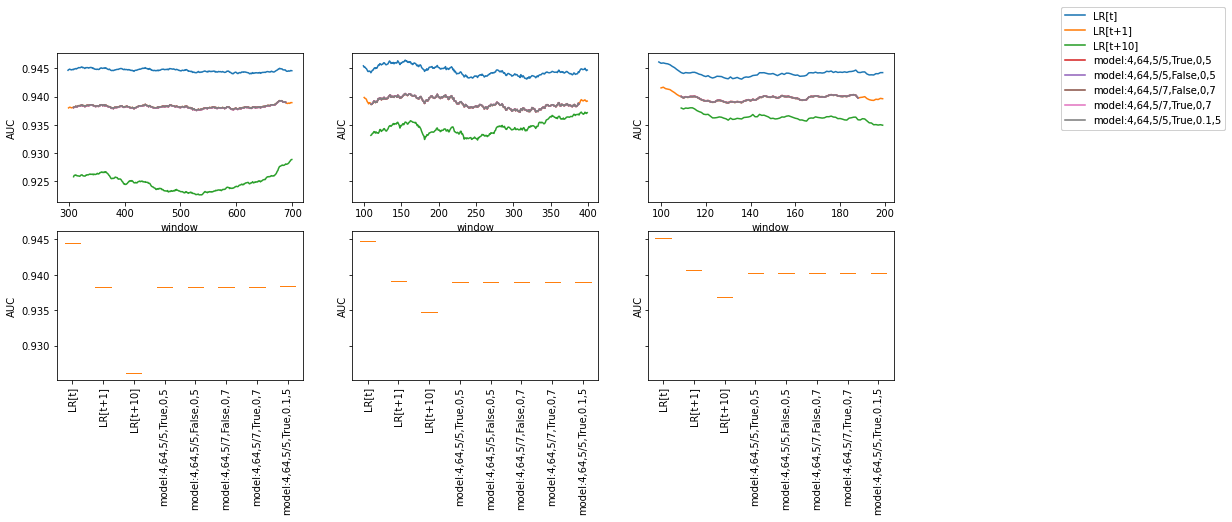

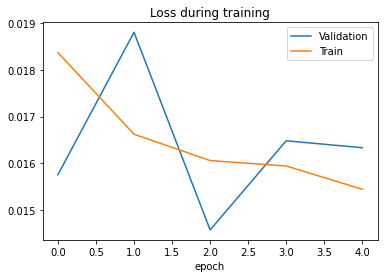

epoch 0 batch 200 loss=0.0142, MTL=0.0158, MVL=0.0146				
epoch 0 batch 400 loss=0.018, MTL=0.0158, MVL=0.0146				
epoch 1 batch 600 loss=0.0149, MTL=0.0157, MVL=0.0167				
epoch 1 batch 800 loss=0.0155, MTL=0.0157, MVL=0.0167				
epoch 2 batch 1000 loss=0.0154, MTL=0.0156, MVL=0.0182				
epoch 2 batch 1200 loss=0.0153, MTL=0.0157, MVL=0.0182				
epoch 3 batch 1400 loss=0.0157, MTL=0.0155, MVL=0.0206				
epoch 3 batch 1600 loss=0.0156, MTL=0.0155, MVL=0.0206				
epoch 4 batch 1800 loss=0.016, MTL=0.0155, MVL=0.0207				
epoch 4 batch 2000 loss=0.0146, MTL=0.0152, MVL=0.0207				


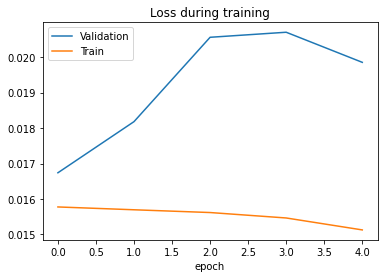

--- 403.3898367881775s seconds of training time for model:2,254,5/5,True,0,5 ---
config in=10, out=5
training model model:2,254,5/5,False,0,5
using train data set to validate
epoch 0 batch 200 loss=0.0184, MTL=0.0186, MVL=0.038				
epoch 0 batch 400 loss=0.0172, MTL=0.0184, MVL=0.038				
saving model MTL=0.018371942928426536, MVL=0.018156211582328653
*epoch 1 batch 600 loss=0.0153, MTL=0.0173, MVL=0.0182				
*epoch 1 batch 800 loss=0.0176, MTL=0.0168, MVL=0.0182				
saving model MTL=0.016674342120010364, MVL=0.01598002212057557
*epoch 2 batch 1000 loss=0.0163, MTL=0.0162, MVL=0.016				
*epoch 2 batch 1200 loss=0.0176, MTL=0.0161, MVL=0.016				
saving model MTL=0.01605709298249274, MVL=0.015902087694640524
*epoch 3 batch 1400 loss=0.017, MTL=0.016, MVL=0.0159				
*epoch 3 batch 1600 loss=0.0147, MTL=0.0157, MVL=0.0159				
saving model MTL=0.01564467287521302, MVL=0.01532196274401478
*epoch 4 batch 1800 loss=0.0137, MTL=0.0152, MVL=0.0153				
*epoch 4 batch 2000 loss=0.0135, MTL=0.0152, 

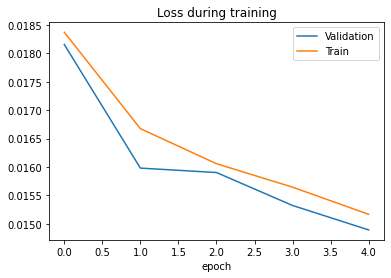

using train data set to validate
epoch 0 batch 200 loss=0.016, MTL=0.0146, MVL=0.0149				
epoch 0 batch 400 loss=0.0133, MTL=0.0146, MVL=0.0149				
saving model MTL=0.014564307546350614, MVL=0.014416594056124362
*epoch 1 batch 600 loss=0.0146, MTL=0.0144, MVL=0.0144				
*epoch 1 batch 800 loss=0.0134, MTL=0.0144, MVL=0.0144				
saving model MTL=0.014346784126985706, MVL=0.0142519576324464
*epoch 2 batch 1000 loss=0.0155, MTL=0.0143, MVL=0.0143				
*epoch 2 batch 1200 loss=0.0136, MTL=0.0142, MVL=0.0143				
saving model MTL=0.014169972959914467, MVL=0.014058447729013258
*epoch 3 batch 1400 loss=0.015, MTL=0.014, MVL=0.0141				
*epoch 3 batch 1600 loss=0.0137, MTL=0.014, MVL=0.0141				
saving model MTL=0.014002571314762563, MVL=0.013909804260500171
*epoch 4 batch 1800 loss=0.0135, MTL=0.0137, MVL=0.0139				
*epoch 4 batch 2000 loss=0.015, MTL=0.0139, MVL=0.0139				
saving model MTL=0.013839529947685314, MVL=0.013703637111149126


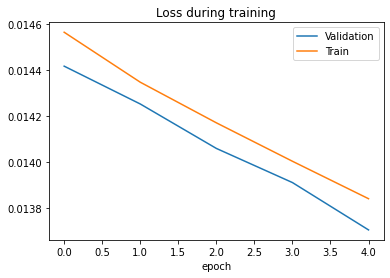

--- 550.925324678421s seconds of training time for model:2,254,5/5,False,0,5 ---
config in=10, out=5
training model model:2,254,5/7,False,0,7
using train data set to validate
epoch 0 batch 200 loss=0.0183, MTL=0.0187, MVL=0.038				
epoch 0 batch 400 loss=0.0179, MTL=0.0184, MVL=0.038				
saving model MTL=0.018391379563882086, MVL=0.018137650719174888
*epoch 1 batch 600 loss=0.0205, MTL=0.0182, MVL=0.0181				
*epoch 1 batch 800 loss=0.0183, MTL=0.018, MVL=0.0181				
saving model MTL=0.017854253049535508, MVL=0.01638456443045073
*epoch 2 batch 1000 loss=0.0153, MTL=0.0163, MVL=0.0164				
*epoch 2 batch 1200 loss=0.0157, MTL=0.0163, MVL=0.0164				
saving model MTL=0.016223446074572087, MVL=0.015953886126948834
*epoch 3 batch 1400 loss=0.0167, MTL=0.0161, MVL=0.016				
*epoch 3 batch 1600 loss=0.016, MTL=0.016, MVL=0.016				
epoch 4 batch 1800 loss=0.0145, MTL=0.0159, MVL=0.016				
epoch 4 batch 2000 loss=0.0156, MTL=0.0156, MVL=0.016				
saving model MTL=0.01543412214536521, MVL=0.0150192

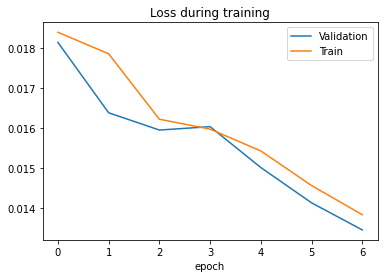

using train data set to validate
epoch 0 batch 200 loss=0.0134, MTL=0.013, MVL=0.0135				
epoch 0 batch 400 loss=0.0127, MTL=0.013, MVL=0.0135				
saving model MTL=0.01295838460291781, MVL=0.012811758166166155
*epoch 1 batch 600 loss=0.013, MTL=0.0127, MVL=0.0128				
*epoch 1 batch 800 loss=0.0138, MTL=0.0127, MVL=0.0128				
saving model MTL=0.012720866782663875, MVL=0.012606920773382825
*epoch 2 batch 1000 loss=0.013, MTL=0.0126, MVL=0.0126				
*epoch 2 batch 1200 loss=0.0126, MTL=0.0126, MVL=0.0126				
saving model MTL=0.012515769120710138, MVL=0.012357913060909605
*epoch 3 batch 1400 loss=0.013, MTL=0.0123, MVL=0.0124				
*epoch 3 batch 1600 loss=0.0126, MTL=0.0124, MVL=0.0124				
saving model MTL=0.012266389670723719, MVL=0.01210851712457784
*epoch 4 batch 1800 loss=0.0115, MTL=0.0121, MVL=0.0121				
*epoch 4 batch 2000 loss=0.0119, MTL=0.012, MVL=0.0121				
saving model MTL=0.011961867852140795, MVL=0.01172058205776278
*epoch 5 batch 2200 loss=0.0131, MTL=0.0118, MVL=0.0117				
*e

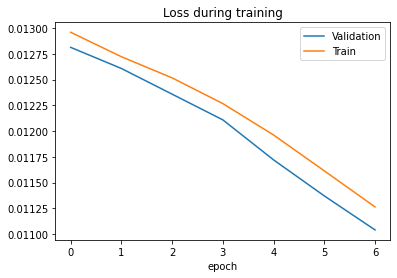

--- 755.2433047294617s seconds of training time for model:2,254,5/7,False,0,7 ---
config in=10, out=5
training model model:2,254,5/7,True,0,7
epoch 0 batch 200 loss=0.0184, MTL=0.0185, MVL=0.0351				
epoch 0 batch 400 loss=0.0201, MTL=0.0184, MVL=0.0351				
saving model MTL=0.018372696144699913, MVL=0.01579175871170935
*epoch 1 batch 600 loss=0.0187, MTL=0.017, MVL=0.0158				
*epoch 1 batch 800 loss=0.0156, MTL=0.0166, MVL=0.0158				
saving model MTL=0.01657757049267273, MVL=0.014640411010897551
*epoch 2 batch 1000 loss=0.016, MTL=0.0161, MVL=0.0146				
*epoch 2 batch 1200 loss=0.0154, MTL=0.016, MVL=0.0146				
epoch 3 batch 1400 loss=0.017, MTL=0.016, MVL=0.0154				
epoch 3 batch 1600 loss=0.0158, MTL=0.0158, MVL=0.0154				
epoch 4 batch 1800 loss=0.0135, MTL=0.0153, MVL=0.0199				
epoch 4 batch 2000 loss=0.0147, MTL=0.0152, MVL=0.0199				
epoch 5 batch 2200 loss=0.0147, MTL=0.0146, MVL=0.0212				
epoch 5 batch 2400 loss=0.0147, MTL=0.0142, MVL=0.0212				
epoch 6 batch 2600 loss=0.012

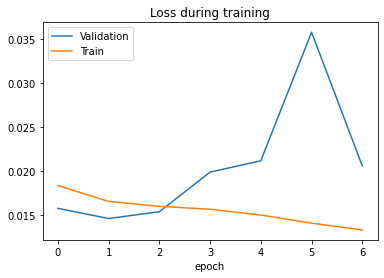

epoch 0 batch 200 loss=0.0155, MTL=0.0158, MVL=0.0146				
epoch 0 batch 400 loss=0.0144, MTL=0.0159, MVL=0.0146				
epoch 1 batch 600 loss=0.0152, MTL=0.0158, MVL=0.0148				
epoch 1 batch 800 loss=0.0165, MTL=0.0158, MVL=0.0148				
epoch 2 batch 1000 loss=0.0169, MTL=0.0158, MVL=0.0153				
epoch 2 batch 1200 loss=0.0164, MTL=0.0158, MVL=0.0153				
epoch 3 batch 1400 loss=0.0153, MTL=0.0158, MVL=0.0159				
epoch 3 batch 1600 loss=0.0167, MTL=0.0157, MVL=0.0159				
epoch 4 batch 1800 loss=0.0163, MTL=0.0157, MVL=0.0168				
epoch 4 batch 2000 loss=0.0158, MTL=0.0156, MVL=0.0168				
epoch 5 batch 2200 loss=0.0151, MTL=0.0155, MVL=0.0181				
epoch 5 batch 2400 loss=0.015, MTL=0.0155, MVL=0.0181				
epoch 6 batch 2600 loss=0.0158, MTL=0.0164, MVL=0.0183				
epoch 6 batch 2800 loss=0.0141, MTL=0.0151, MVL=0.0183				
epoch 6 batch 3000 loss=0.0138, MTL=0.015, MVL=0.0183				


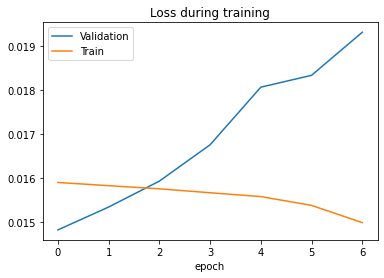

--- 559.964273929596s seconds of training time for model:2,254,5/7,True,0,7 ---
config in=10, out=5
training model model:2,254,5/5,True,0.1,5
epoch 0 batch 200 loss=0.0187, MTL=0.0195, MVL=0.035				
epoch 0 batch 400 loss=0.0186, MTL=0.0188, MVL=0.035				
saving model MTL=0.018798642576721605, MVL=0.01579749436102441
*epoch 1 batch 600 loss=0.018, MTL=0.0182, MVL=0.0158				
*epoch 1 batch 800 loss=0.0187, MTL=0.0181, MVL=0.0158				
epoch 2 batch 1000 loss=0.0182, MTL=0.0181, MVL=0.0158				
epoch 2 batch 1200 loss=0.019, MTL=0.0181, MVL=0.0158				
saving model MTL=0.018149193363397556, MVL=0.015744533481412245
*epoch 3 batch 1400 loss=0.0175, MTL=0.0184, MVL=0.0157				
*epoch 3 batch 1600 loss=0.0159, MTL=0.0183, MVL=0.0157				
epoch 4 batch 1800 loss=0.0163, MTL=0.0181, MVL=0.0158				
epoch 4 batch 2000 loss=0.0184, MTL=0.0181, MVL=0.0158				


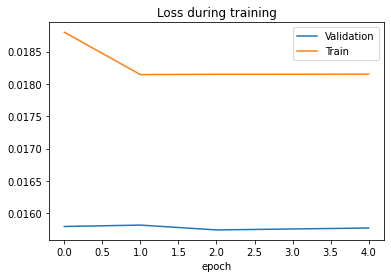

epoch 0 batch 200 loss=0.0183, MTL=0.0181, MVL=0.0158				
epoch 0 batch 400 loss=0.0189, MTL=0.0181, MVL=0.0158				
saving model MTL=0.018130722974037738, MVL=0.015730879681765057
*epoch 1 batch 600 loss=0.0169, MTL=0.0183, MVL=0.0157				
*epoch 1 batch 800 loss=0.0177, MTL=0.0181, MVL=0.0157				
saving model MTL=0.01812930371801586, MVL=0.015687819417627133
*epoch 2 batch 1000 loss=0.0192, MTL=0.018, MVL=0.0157				
*epoch 2 batch 1200 loss=0.0176, MTL=0.0181, MVL=0.0157				
saving model MTL=0.018129852927326467, MVL=0.015662614378284236
*epoch 3 batch 1400 loss=0.02, MTL=0.0181, MVL=0.0157				
*epoch 3 batch 1600 loss=0.0178, MTL=0.0182, MVL=0.0157				
epoch 4 batch 1800 loss=0.0183, MTL=0.0182, MVL=0.0158				
epoch 4 batch 2000 loss=0.0186, MTL=0.0182, MVL=0.0158				


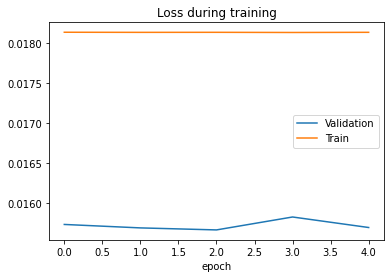

--- 2266.0720863342285s seconds of training time for model:2,254,5/5,True,0.1,5 ---
config in=10, out=8
training model model:2,128,8/5,True,0,5
epoch 0 batch 200 loss=0.0208, MTL=0.021, MVL=0.0481				
epoch 0 batch 400 loss=0.0199, MTL=0.0208, MVL=0.0481				
saving model MTL=0.020780991668019583, MVL=0.0163803876688083
*epoch 1 batch 600 loss=0.0209, MTL=0.0206, MVL=0.0164				
*epoch 1 batch 800 loss=0.0192, MTL=0.0198, MVL=0.0164				
epoch 2 batch 1000 loss=0.0169, MTL=0.0185, MVL=0.0171				
epoch 2 batch 1200 loss=0.0185, MTL=0.0183, MVL=0.0171				
epoch 3 batch 1400 loss=0.0168, MTL=0.0177, MVL=0.0169				
epoch 3 batch 1600 loss=0.0167, MTL=0.0176, MVL=0.0169				
epoch 4 batch 1800 loss=0.017, MTL=0.0163, MVL=0.0208				
epoch 4 batch 2000 loss=0.0146, MTL=0.0161, MVL=0.0208				


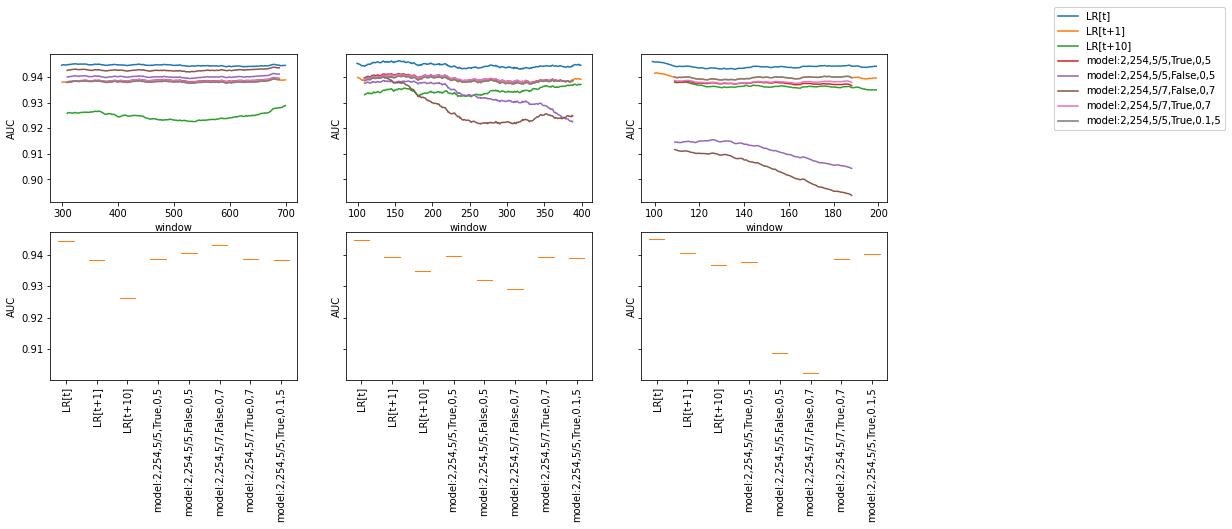

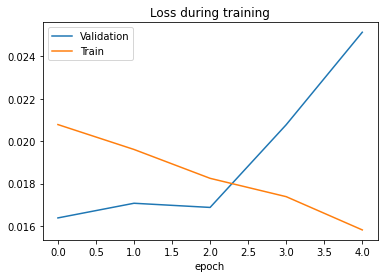

epoch 0 batch 200 loss=0.0206, MTL=0.0204, MVL=0.0164				
epoch 0 batch 400 loss=0.0195, MTL=0.0203, MVL=0.0164				
saving model MTL=0.020349428807902668, MVL=0.016225701617076992
*epoch 1 batch 600 loss=0.0209, MTL=0.0202, MVL=0.0162				
*epoch 1 batch 800 loss=0.0201, MTL=0.0199, MVL=0.0162				
epoch 2 batch 1000 loss=0.0192, MTL=0.0186, MVL=0.0163				
epoch 2 batch 1200 loss=0.0192, MTL=0.0185, MVL=0.0163				
epoch 3 batch 1400 loss=0.019, MTL=0.0182, MVL=0.0164				
epoch 3 batch 1600 loss=0.0172, MTL=0.0179, MVL=0.0164				
epoch 4 batch 1800 loss=0.0173, MTL=0.0176, MVL=0.0172				
epoch 4 batch 2000 loss=0.0184, MTL=0.0176, MVL=0.0172				


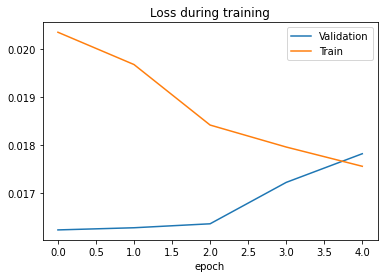

--- 247.88889694213867s seconds of training time for model:2,128,8/5,True,0,5 ---
config in=10, out=8
training model model:2,128,8/5,False,0,5
using train data set to validate
epoch 0 batch 200 loss=0.0204, MTL=0.0211, MVL=0.0521				
epoch 0 batch 400 loss=0.0185, MTL=0.0208, MVL=0.0521				
saving model MTL=0.020785905925246578, MVL=0.020518640677134197
*epoch 1 batch 600 loss=0.0212, MTL=0.0205, MVL=0.0205				
*epoch 1 batch 800 loss=0.0193, MTL=0.0197, MVL=0.0205				
saving model MTL=0.019521507255612285, MVL=0.018456251429462875
*epoch 2 batch 1000 loss=0.0202, MTL=0.0184, MVL=0.0185				
*epoch 2 batch 1200 loss=0.018, MTL=0.0183, MVL=0.0185				
saving model MTL=0.018227437955189357, MVL=0.017867703622431255
*epoch 3 batch 1400 loss=0.0187, MTL=0.0179, MVL=0.0179				
*epoch 3 batch 1600 loss=0.0178, MTL=0.0178, MVL=0.0179				
saving model MTL=0.017713091387930844, MVL=0.01720492150505177
*epoch 4 batch 1800 loss=0.017, MTL=0.0174, MVL=0.0172				
*epoch 4 batch 2000 loss=0.0153, MTL=

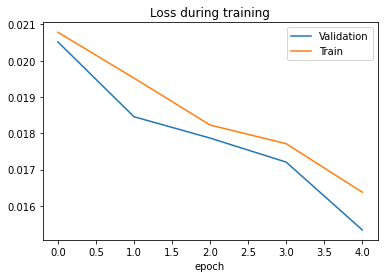

using train data set to validate
epoch 0 batch 200 loss=0.0146, MTL=0.0149, MVL=0.0153				
epoch 0 batch 400 loss=0.015, MTL=0.0148, MVL=0.0153				
saving model MTL=0.014770916356981077, MVL=0.014598785039399646
*epoch 1 batch 600 loss=0.0128, MTL=0.0146, MVL=0.0146				
*epoch 1 batch 800 loss=0.014, MTL=0.0145, MVL=0.0146				
saving model MTL=0.014432111662312376, MVL=0.014227894361182634
*epoch 2 batch 1000 loss=0.0136, MTL=0.0143, MVL=0.0142				
*epoch 2 batch 1200 loss=0.0126, MTL=0.0142, MVL=0.0142				
saving model MTL=0.014102250212562029, MVL=0.013956712384242564
*epoch 3 batch 1400 loss=0.0127, MTL=0.0138, MVL=0.014				
*epoch 3 batch 1600 loss=0.0145, MTL=0.0138, MVL=0.014				
saving model MTL=0.013734577234437759, MVL=0.013555738650245109
*epoch 4 batch 1800 loss=0.0136, MTL=0.0134, MVL=0.0136				
*epoch 4 batch 2000 loss=0.0129, MTL=0.0135, MVL=0.0136				
saving model MTL=0.013412803676651998, MVL=0.01323881183742304


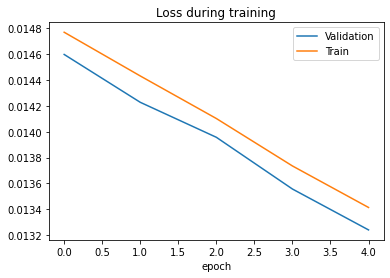

--- 348.34672141075134s seconds of training time for model:2,128,8/5,False,0,5 ---
config in=10, out=8
training model model:2,128,8/7,False,0,7
using train data set to validate
epoch 0 batch 200 loss=0.0214, MTL=0.021, MVL=0.0521				
epoch 0 batch 400 loss=0.0198, MTL=0.0208, MVL=0.0521				
saving model MTL=0.02078031098763286, MVL=0.02047398797650304
*epoch 1 batch 600 loss=0.0202, MTL=0.0204, MVL=0.0205				
*epoch 1 batch 800 loss=0.0162, MTL=0.0198, MVL=0.0205				
saving model MTL=0.019628291238202818, MVL=0.01828624849871698
*epoch 2 batch 1000 loss=0.0171, MTL=0.0185, MVL=0.0183				
*epoch 2 batch 1200 loss=0.0168, MTL=0.0184, MVL=0.0183				
saving model MTL=0.01827652986739176, MVL=0.01800036716007593
*epoch 3 batch 1400 loss=0.0179, MTL=0.0179, MVL=0.018				
*epoch 3 batch 1600 loss=0.0174, MTL=0.0176, MVL=0.018				
saving model MTL=0.01749448179853735, MVL=0.016864519775413943
*epoch 4 batch 1800 loss=0.017, MTL=0.0167, MVL=0.0169				
*epoch 4 batch 2000 loss=0.0173, MTL=0.0164

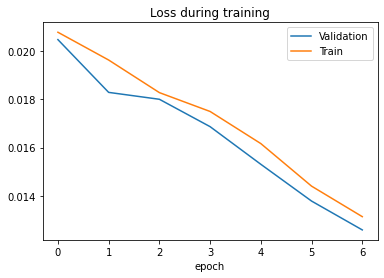

using train data set to validate
epoch 0 batch 200 loss=0.0121, MTL=0.0119, MVL=0.0126				
epoch 0 batch 400 loss=0.0125, MTL=0.0118, MVL=0.0126				
saving model MTL=0.011805301749889084, MVL=0.011626491872852461
*epoch 1 batch 600 loss=0.0117, MTL=0.0116, MVL=0.0116				
*epoch 1 batch 800 loss=0.0116, MTL=0.0116, MVL=0.0116				
saving model MTL=0.011546963957328073, MVL=0.011397890729346761
*epoch 2 batch 1000 loss=0.0102, MTL=0.0114, MVL=0.0114				
*epoch 2 batch 1200 loss=0.0117, MTL=0.0114, MVL=0.0114				
saving model MTL=0.011342236890750765, MVL=0.011199393436847324
*epoch 3 batch 1400 loss=0.0108, MTL=0.0112, MVL=0.0112				
*epoch 3 batch 1600 loss=0.0112, MTL=0.0112, MVL=0.0112				
saving model MTL=0.011145638571448487, MVL=0.011021816529575046
*epoch 4 batch 1800 loss=0.0112, MTL=0.011, MVL=0.011				
*epoch 4 batch 2000 loss=0.0103, MTL=0.011, MVL=0.011				
saving model MTL=0.010946810163592023, MVL=0.010883393841881858
*epoch 5 batch 2200 loss=0.0101, MTL=0.0107, MVL=0.0109		

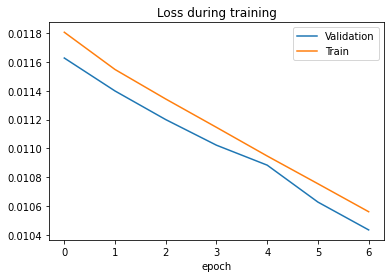

--- 485.9190273284912s seconds of training time for model:2,128,8/7,False,0,7 ---
config in=10, out=8
training model model:2,128,8/7,True,0,7
epoch 0 batch 200 loss=0.0211, MTL=0.021, MVL=0.0481				
epoch 0 batch 400 loss=0.0254, MTL=0.0208, MVL=0.0481				
saving model MTL=0.02077023600038417, MVL=0.01630431480395297
*epoch 1 batch 600 loss=0.0197, MTL=0.0204, MVL=0.0163				
*epoch 1 batch 800 loss=0.0199, MTL=0.02, MVL=0.0163				
epoch 2 batch 1000 loss=0.0204, MTL=0.0183, MVL=0.0165				
epoch 2 batch 1200 loss=0.0182, MTL=0.0183, MVL=0.0165				
epoch 3 batch 1400 loss=0.0169, MTL=0.0181, MVL=0.0173				
epoch 3 batch 1600 loss=0.0196, MTL=0.0178, MVL=0.0173				
epoch 4 batch 1800 loss=0.0155, MTL=0.017, MVL=0.0206				
epoch 4 batch 2000 loss=0.0169, MTL=0.0168, MVL=0.0206				
epoch 5 batch 2200 loss=0.015, MTL=0.0158, MVL=0.0269				
epoch 5 batch 2400 loss=0.015, MTL=0.0155, MVL=0.0269				
epoch 6 batch 2600 loss=0.0142, MTL=0.0145, MVL=0.0297				
epoch 6 batch 2800 loss=0.0128, MTL=0

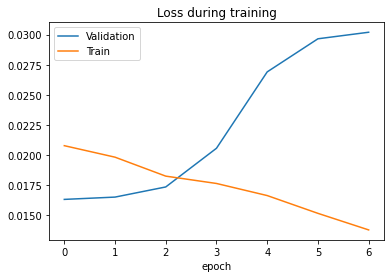

epoch 0 batch 200 loss=0.0195, MTL=0.0205, MVL=0.0163				
epoch 0 batch 400 loss=0.0206, MTL=0.0204, MVL=0.0163				
saving model MTL=0.02036634441982541, MVL=0.016227110770220557
*epoch 1 batch 600 loss=0.0189, MTL=0.0203, MVL=0.0162				
*epoch 1 batch 800 loss=0.0208, MTL=0.0202, MVL=0.0162				
epoch 2 batch 1000 loss=0.0184, MTL=0.0192, MVL=0.0163				
epoch 2 batch 1200 loss=0.0179, MTL=0.0187, MVL=0.0163				
epoch 3 batch 1400 loss=0.0198, MTL=0.0181, MVL=0.0174				
epoch 3 batch 1600 loss=0.0174, MTL=0.0179, MVL=0.0174				
epoch 4 batch 1800 loss=0.018, MTL=0.0177, MVL=0.0184				
epoch 4 batch 2000 loss=0.0167, MTL=0.0176, MVL=0.0184				
epoch 5 batch 2200 loss=0.0162, MTL=0.0174, MVL=0.0188				
epoch 5 batch 2400 loss=0.0167, MTL=0.0173, MVL=0.0188				
epoch 6 batch 2600 loss=0.0176, MTL=0.0175, MVL=0.0193				
epoch 6 batch 2800 loss=0.0164, MTL=0.0171, MVL=0.0193				
epoch 6 batch 3000 loss=0.017, MTL=0.017, MVL=0.0193				


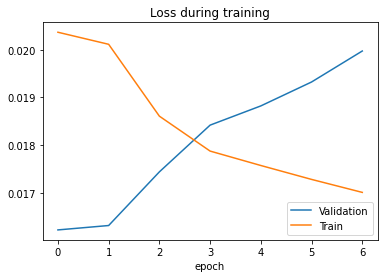

--- 352.1250581741333s seconds of training time for model:2,128,8/7,True,0,7 ---
config in=10, out=8
training model model:2,128,8/5,True,0.1,5
epoch 0 batch 200 loss=0.0207, MTL=0.0223, MVL=0.0481				
epoch 0 batch 400 loss=0.0199, MTL=0.0214, MVL=0.0481				
saving model MTL=0.021291326183860225, MVL=0.01627022693865001
*epoch 1 batch 600 loss=0.0199, MTL=0.0204, MVL=0.0163				
*epoch 1 batch 800 loss=0.0195, MTL=0.0204, MVL=0.0163				
saving model MTL=0.02042061710057573, MVL=0.016248134803026913
*epoch 2 batch 1000 loss=0.0212, MTL=0.0206, MVL=0.0162				
*epoch 2 batch 1200 loss=0.0188, MTL=0.0204, MVL=0.0162				
saving model MTL=0.02043181410300787, MVL=0.01623103404417634
*epoch 3 batch 1400 loss=0.0203, MTL=0.0205, MVL=0.0162				
*epoch 3 batch 1600 loss=0.0215, MTL=0.0204, MVL=0.0162				
saving model MTL=0.02042773449189823, MVL=0.01622372621980806
*epoch 4 batch 1800 loss=0.0194, MTL=0.0203, MVL=0.0162				
*epoch 4 batch 2000 loss=0.0192, MTL=0.0204, MVL=0.0162				


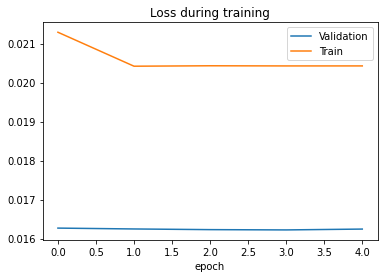

epoch 0 batch 200 loss=0.0203, MTL=0.0204, MVL=0.0162				
epoch 0 batch 400 loss=0.0194, MTL=0.0204, MVL=0.0162				
saving model MTL=0.020395301860170783, MVL=0.016181732155382635
*epoch 1 batch 600 loss=0.0234, MTL=0.0204, MVL=0.0162				
*epoch 1 batch 800 loss=0.0194, MTL=0.0204, MVL=0.0162				
epoch 2 batch 1000 loss=0.0217, MTL=0.0205, MVL=0.0162				
epoch 2 batch 1200 loss=0.0198, MTL=0.0204, MVL=0.0162				
epoch 3 batch 1400 loss=0.0214, MTL=0.0203, MVL=0.0162				
epoch 3 batch 1600 loss=0.0182, MTL=0.0204, MVL=0.0162				
saving model MTL=0.020394074812496978, MVL=0.01617321322361628
*epoch 4 batch 1800 loss=0.0184, MTL=0.0206, MVL=0.0162				
*epoch 4 batch 2000 loss=0.0205, MTL=0.0205, MVL=0.0162				
saving model MTL=0.02039472136594769, MVL=0.01617015600204468


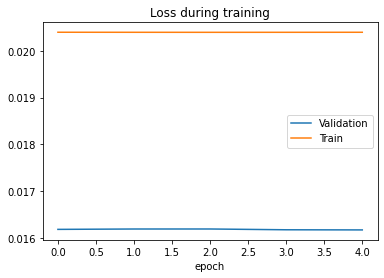

--- 1002.4375102519989s seconds of training time for model:2,128,8/5,True,0.1,5 ---


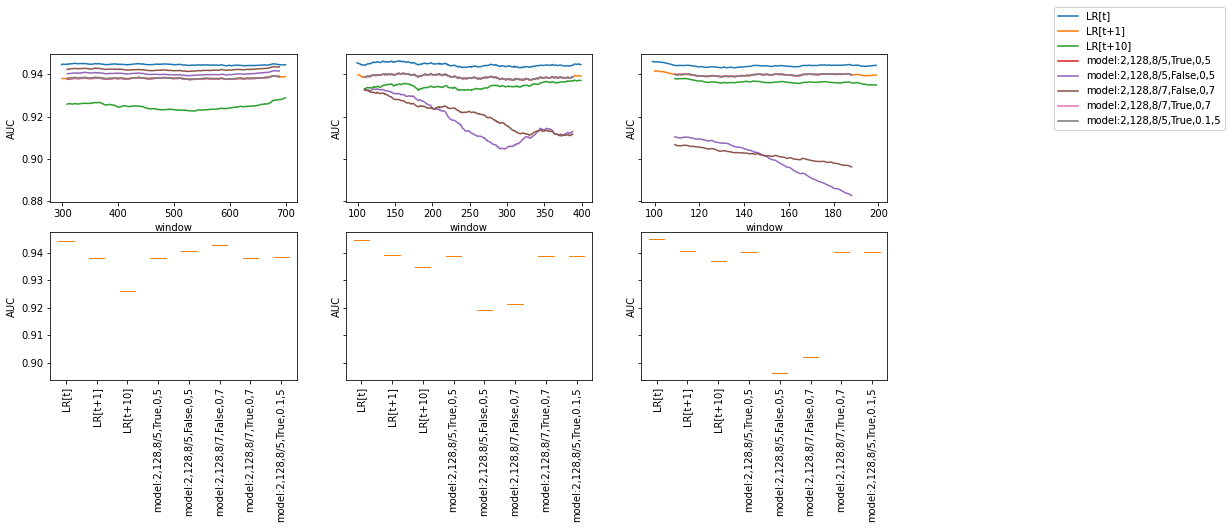

In [10]:
'''
MODEL options:
num_of_layers, hidden, output_seq_leng, 

Training options:
patience, validate, weight_decay, max_epochs
'''
import copy, time

model_options = [
    (2, 128, 5), 
    (3, 128, 5),
    (4, 64, 5),
    (2, 254, 5),
    (2, 128, 8)]
training_options = [
    (5, True, 0, 5), 
    (5, False, 0, 5),
    (7, False, 0, 7),
    (7, True, 0, 7),
    (5, True, 0.1, 5)]

models = []

for idx, option in enumerate(model_options):
    num_layers, hidden, output_sequence_length = option
    model = m_agg.AutoregLstmLr(dim_p + dim_d, dim_lr, num_layers=num_layers, hidden=hidden,
                            output_sequence_length=output_sequence_length, return_deltas=False)
    trainings = []
    for t_option in training_options:
        start_time = time.time()
        
        patience, validate, weight_decay, max_epochs = t_option
        next_model = copy.deepcopy(model)
        next_model.name = f'model:{num_layers},{hidden},{output_sequence_length}/{patience},{validate},{weight_decay},{max_epochs}'
        train.train_window_models([next_model], wg_tmp, patience=patience, validate=validate, weight_decay=weight_decay, max_epochs=max_epochs,
                          lrs=[0.001, 0.0001])
        next_model.window_config.output_sequence_length = 1
        next_model.return_deltas = False
        trainings += [next_model]
        
        print(f"--- {(time.time() - start_time)}s seconds of training time for model:{num_layers},{hidden},{output_sequence_length}/{patience},{validate},{weight_decay},{max_epochs} ---")
    
    models += [trainings]
    plot_only(trainings, wg_tmp)

    

    